# Trabajo Práctico: Predicción de lluvia en Australia.

**Materia:** Aprendizaje Automático I (IA41)

**Comisión:** C-31527

**Año académico:** 2024

**Período lectivo:** 1° cuatrimestre

**Integrantes:**
- Britos Julián Francisco
- Moresco Brisa

# Terminado

A continuación, se enlistarán las correcciones que fueron sugeridas hacer y fueron hechas, listas para ser revisadas nuevamente:
- El ploteo de la matriz de correlación luego de haber generado las variables dummies, no es muy recomendado ya que confunde su interpretación innecesariamente.
- Resta completar el análisis estadístico descriptivo con gráficos, comentarios y conclusiones.
- Realizar la imputación de nulos previo a dividir el set de datos en train y test, ¿creen que es la mejor opción? Podría generarse data leakage.
- En cuanto a la forma de hacer el split del set de datos, ¿creen que es la correcta para evitar data leakage? Se trata de un conjunto con fuerte dependencia cronológica.

# To Do List

A continuación, se enlistarán las **correcciones** que fueron sugeridas hacer:
- ¿Está el set de datos balanceado o no?

- Es importante agregar una gráfica de pérdida vs. iteraciones del gradiente descendente para observar que el modelo converja.

- En cuanto al cálculo de métricas, restan las correspondientes al set de entrenamiento. ¿Por qué ambas son necesarias?

- ¿Consiguió un buen fitting?

- ¿Conclusiones?

A continuación, se enlistarán las cuestiones **generales** que faltan realizar:

- Probar con el método de regularización Elastic Net

- Obtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE, MAPE, elegir) tanto para entrenamiento como para prueba. ¿Por qué para ambos conjuntos?

- ¿Creen que han conseguido un buen fitting?

5. Implementar la solución del problema de clasificación con regresión logística.
- Obtener las métricas adecuadas (entre Accuracy, precision, recall, F1 Score, entre otras, ¡investiguen adicionales!). Graficar matrices de confusión para cada modelo. Analizar “falsos negativos” y “falsos positivos”, ¿qué significa cada uno?
- Trazar curvas ROC para cada modelo. Comente cuáles serían los umbrales adecuados a utilizar; ¿cómo podría calcular el mejor umbral? ¿Es 0.5 el mejor?
- ¿Creen que han conseguido un buen fitting?

6. Implementar un modelo base para clasificación y uno para regresión.

7. Optimizar la selección de hiperparámetros.
- Probar validación cruzada k-folds, si corresponde.
- Utilizar grid search, random search u optuna. Justificar su uso. Justificar los hiperparámetros que se están optimizando.

8. Implementar explicabilidad del modelo.
- Utilizar SHAP o similar. Implementar al menos dos gráficas a nivel local y dos gráficas a nivel global. ¡Escribir lo que se observa!
- ¿Cuáles son las variables más importantes? ¿Cuáles son las menos? ¿Coinciden en ambos modelos (regresión/clasificación)?

9. Implementar las soluciones con una red neuronal.
- Obtener las métricas adecuadas.
- Repetir los pasos 7 y 8 para las redes neuronales. ¿Qué diferencias hay con los modelos de regresión lineal y logística?

10. Comparación de modelos.
- Incluyan en su análisis una comparación de modelos: de todos los modelos de regresión, ¿cuál es el mejor? Escoger una métrica adecuada para poder compararlos. Lo mismo con los de clasificación.

11. MLOps
- Realizar un script app.py donde se utilice streamlit para la puesta en producción, donde el modelo para predecir debe ser el que se elija en el ítem 10.
- Se valorará incorporación de pipeline con clases y funciones que se encarguen de hacer las transformaciones de datos, aunque no es necesario.
- El script debe permitir incorporar datos en un frontend de streamlit y debe mostrar la predicción para dichos valores. Se valora incorporar manejo de errores. Se valora el trabajo realizado para mejorar el frontend de la aplicación; sin embargo es suficiente con una interfaz que sea útil.
- A su vez, se especifica el requerimiento de un script que tenga funciones para tomar datos de entrada (que estén en el mismo formato del dataset)

12. Escribir una conclusión del trabajo.

13. Preparar una defensa del trabajo práctico. La presentación de forma oral se hace sobre el notebook de trabajo y la aplicación de streamlit, en un total de 20 minutos, donde deben destacar lo que consideren más relevante, ya que no es tiempo suficiente para mostrar absolutamente todo. ¡Planificar la gestión de tiempos es parte de la calidad de la presentación del trabajo realizado! Se recomienda previa práctica.

# Librerías

In [ ]:
#!pip install pandas
#!pip install seaborn
#!pip install -U scikit-learn
#!pip install numpy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, SGDRegressor, ElasticNet, ElasticNetCV, LassoCV, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Carga de datos

### Contexto:

Este conjunto de datos contiene alrededor de 10 años de observaciones meteorológicas diarias de numerosas estaciones meteorológicas australianas.

### Contenido:

Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, RainfallTomorrow

### Objetivo:

Tras observar los datos del día de hoy, el objetivo es predecir las variables target:
- RainFallTomorrow: cantidad de lluvia del día posterior a la observación. (Problema de **Regresión**).
- RainTomorrow: si el día siguiente llueve o no llueve. (Problema de **Clasificación**).


In [ ]:
file_path= 'weatherAUS.csv'
weather_data = pd.read_csv(file_path, sep=',',engine='python')

# Análisis estadístico descriptivo

## Visualización de datos

Examinaremos los datos para un primer vistazo.

In [ ]:
weather_data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


Como podemos ver, al haber 25 columnas no nos muestra todas, por lo que deberemos realizar un paso más para verlas.

In [ ]:
weather_data.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

A continuación, examinaremos qué tipos de variables son estas columnas.

In [ ]:
weather_data.dtypes

Unnamed: 0            int64
Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

Investiguemos la presencia de valores nulos en los datos.

In [ ]:
weather_data.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

Para concluir nuestra primera inspección, veremos las estadísticas descriptivas del conjunto de datos.

In [ ]:
weather_data.describe(include='all')

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,145412.000000,145412,145412,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135096,135159.000000,...,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142152,142153,142153.000000
unique,NaN,3435,49,NaN,NaN,NaN,NaN,NaN,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,2013-11-11,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
freq,NaN,49,3435,NaN,NaN,NaN,NaN,NaN,9910,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110276,110281,NaN
mean,72728.184393,NaN,NaN,12.195873,23.223176,2.361516,5.468616,7.611241,NaN,40.036564,...,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,NaN,NaN,2.361242
std,41990.722236,NaN,NaN,6.398018,7.118770,8.479338,4.193871,3.785612,NaN,13.607212,...,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,NaN,NaN,8.479084
min,0.000000,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,NaN,0.000000
25%,36362.750000,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,NaN,0.000000
50%,72727.500000,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,NaN,0.000000
75%,109093.250000,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,NaN,0.800000


## Gráficos

### Location

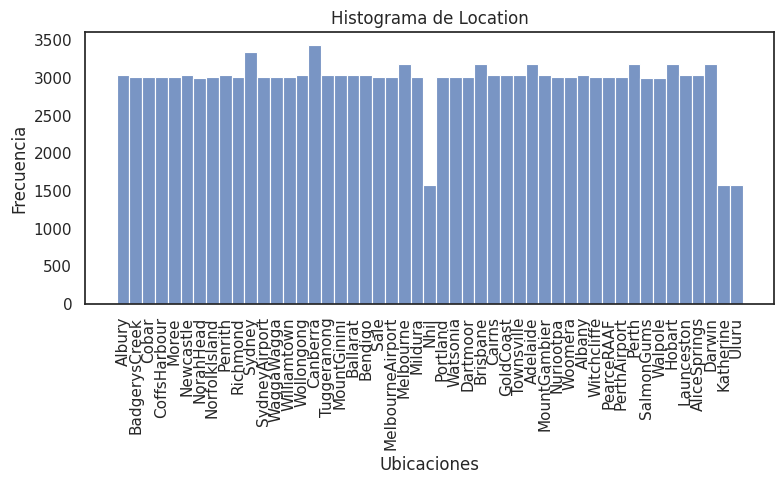

count       145412
unique          49
top       Canberra
freq          3435
Name: Location, dtype: object

In [ ]:
fig, axs = plt.subplots(figsize=(8, 5))

# Histograma
sns.histplot(weather_data['Location'])
axs.set_title('Histograma de Location')
axs.set_xlabel('Ubicaciones')
axs.set_ylabel('Frecuencia')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

weather_data['Location'].describe()


**Histograma:**

El histograma muestra la distribución de las ubicaciones en los datos meteorológicos. Cada barra en el histograma representa la frecuencia de una ubicación específica dentro del conjunto de datos.

**Interpretación:**

Se observa que la frecuencia varía entre las diferentes ubicaciones, lo que indica que algunas ubicaciones tienen más observaciones que otras en el conjunto de datos.

### MinTemp

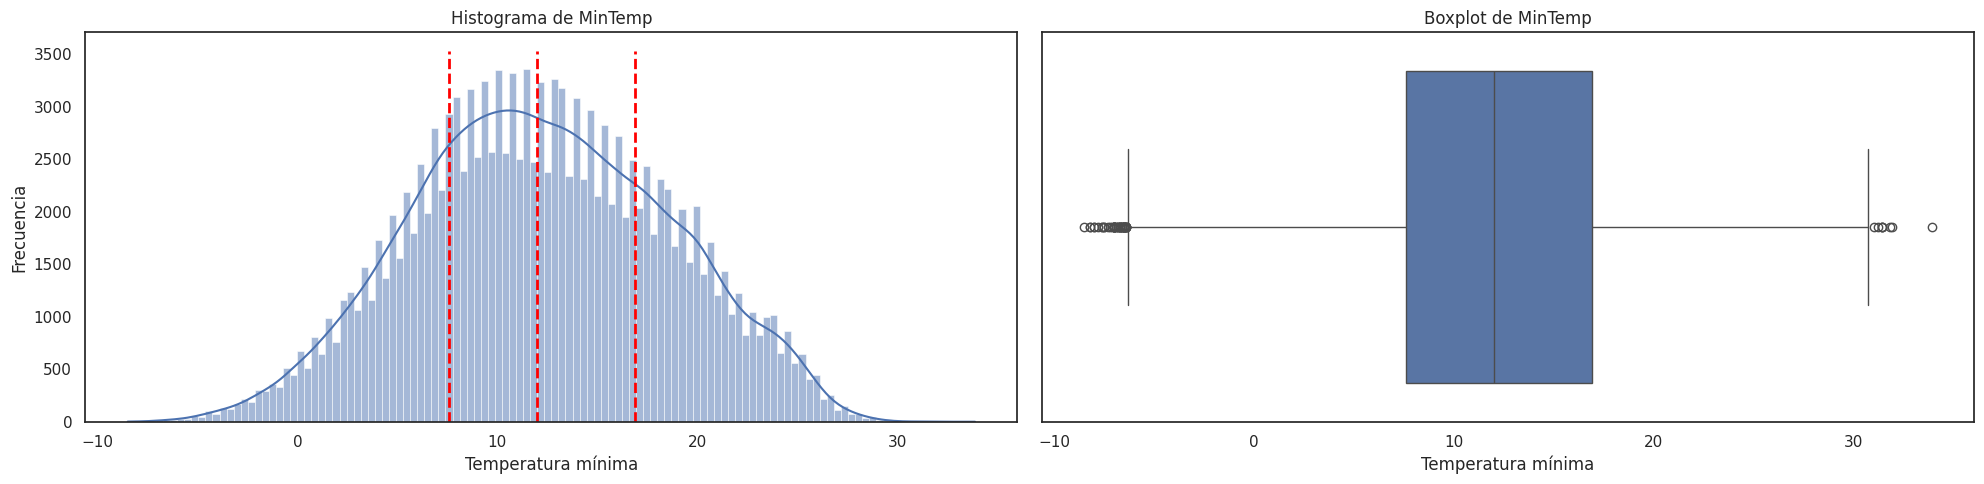

count    143928.000000
mean         12.195873
std           6.398018
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.900000
max          33.900000
Name: MinTemp, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['MinTemp'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de MinTemp')
axs[0].set_xlabel('Temperatura mínima')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['MinTemp'].quantile(0.25)
q2 = weather_data['MinTemp'].quantile(0.5)
q3 = weather_data['MinTemp'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['MinTemp'], ax=axs[1])
axs[1].set_title('Boxplot de MinTemp')
axs[1].set_xlabel('Temperatura mínima')

plt.tight_layout()
plt.show()

weather_data['MinTemp'].describe()

**Histograma:**

El histograma muestra la distribución de la temperatura mínima en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de las temperaturas mínimas se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de temperatura mínima. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos (outliers) que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de temperatura mínima no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la temperatura mínima en los datos meteorológicos presenta una tendencia central, con la mayoría de las temperaturas concentrándose alrededor de 12.00°C. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a temperaturas mínimas. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### MaxTemp

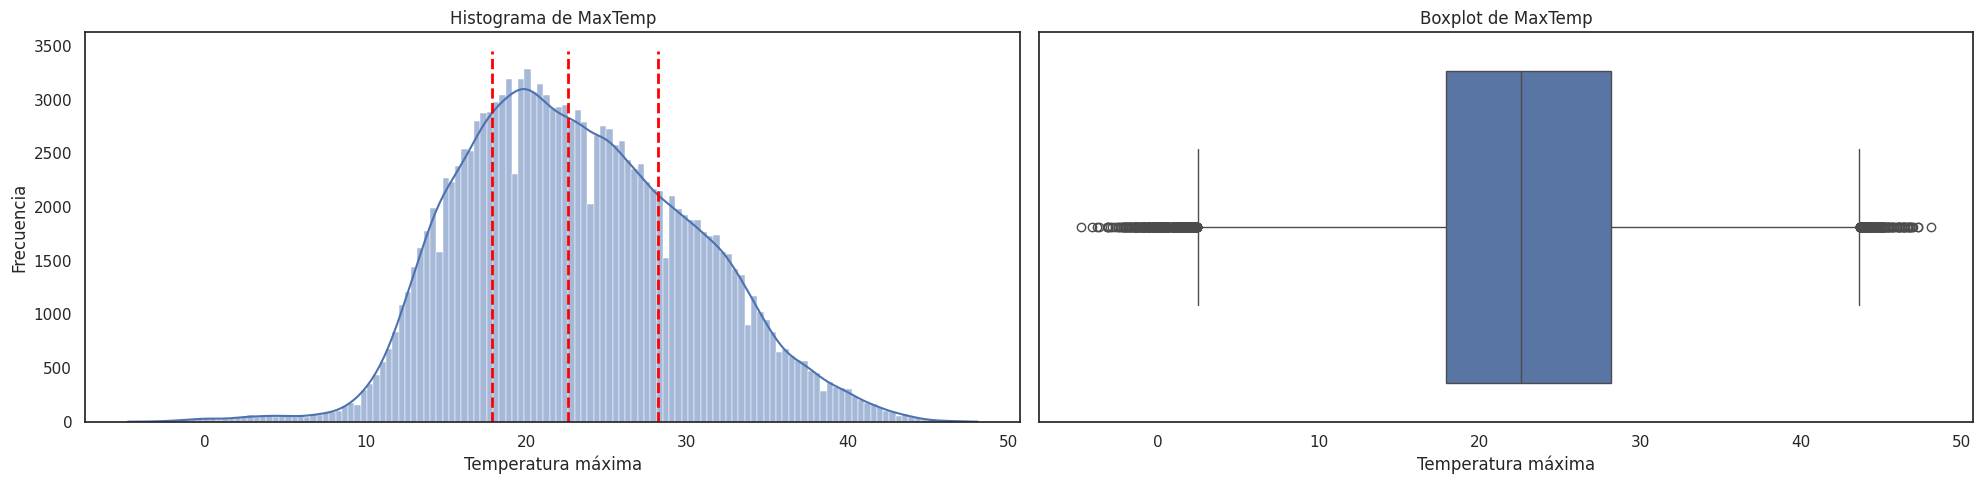

count    144159.000000
mean         23.223176
std           7.118770
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['MaxTemp'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de MaxTemp')
axs[0].set_xlabel('Temperatura máxima')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['MaxTemp'].quantile(0.25)
q2 = weather_data['MaxTemp'].quantile(0.5)
q3 = weather_data['MaxTemp'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['MaxTemp'], ax=axs[1])
axs[1].set_title('Boxplot de MaxTemp')
axs[1].set_xlabel('Temperatura máxima')

plt.tight_layout()
plt.show()

weather_data['MaxTemp'].describe()


**Histograma:**

El histograma muestra la distribución de la temperatura máxima en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de las temperaturas máximas se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de temperatura máxima. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos (outliers) que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de temperatura máxima no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la temperatura máxima en los datos meteorológicos presenta una tendencia central, con la mayoría de las temperaturas concentrándose alrededor de 22.60°C. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a temperaturas máximas. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Rainfall

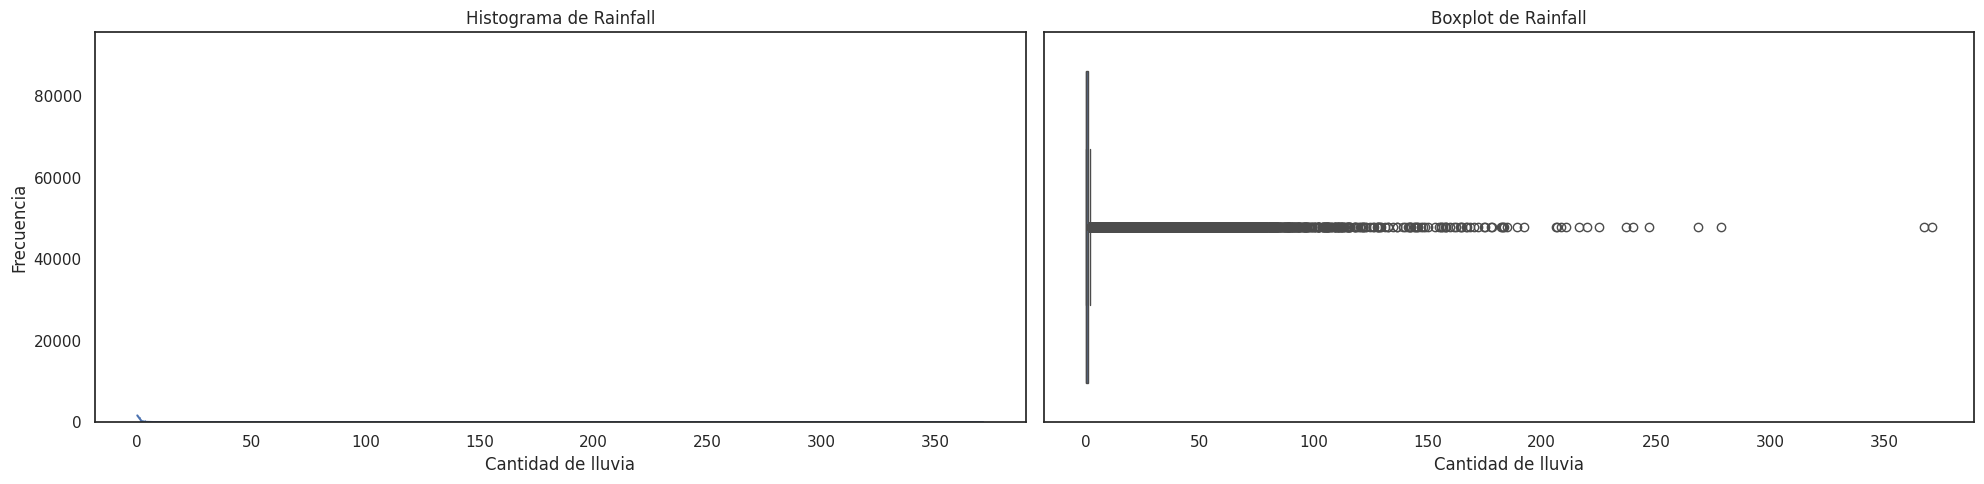

count    142152.000000
mean          2.361516
std           8.479338
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Rainfall'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Rainfall')
axs[0].set_xlabel('Cantidad de lluvia')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=weather_data['Rainfall'], ax=axs[1])
axs[1].set_title('Boxplot de Rainfall')
axs[1].set_xlabel('Cantidad de lluvia')

plt.tight_layout()
plt.show()

weather_data['Rainfall'].describe()


**Histograma:**

El histograma muestra la distribución de la cantidad de lluvia en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de las cantidades de lluvia se concentran cerca de cero, lo que indica una distribución con una tendencia hacia valores bajos. Esto sugiere que la mayoría de los días no tienen lluvia o tienen una cantidad muy pequeña de lluvia.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de cantidad de lluvia. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos días con cantidades de lluvia significativamente altas.

**Interpretación:**

En general, la distribución de la cantidad de lluvia en los datos meteorológicos presenta una tendencia hacia valores bajos, con la mayoría de las cantidades de lluvia concentrándose en 0.00 mm. Sin embargo, la presencia de valores atípicos indica que hay algunos días con cantidades de lluvia significativamente altas.

### Evaporation

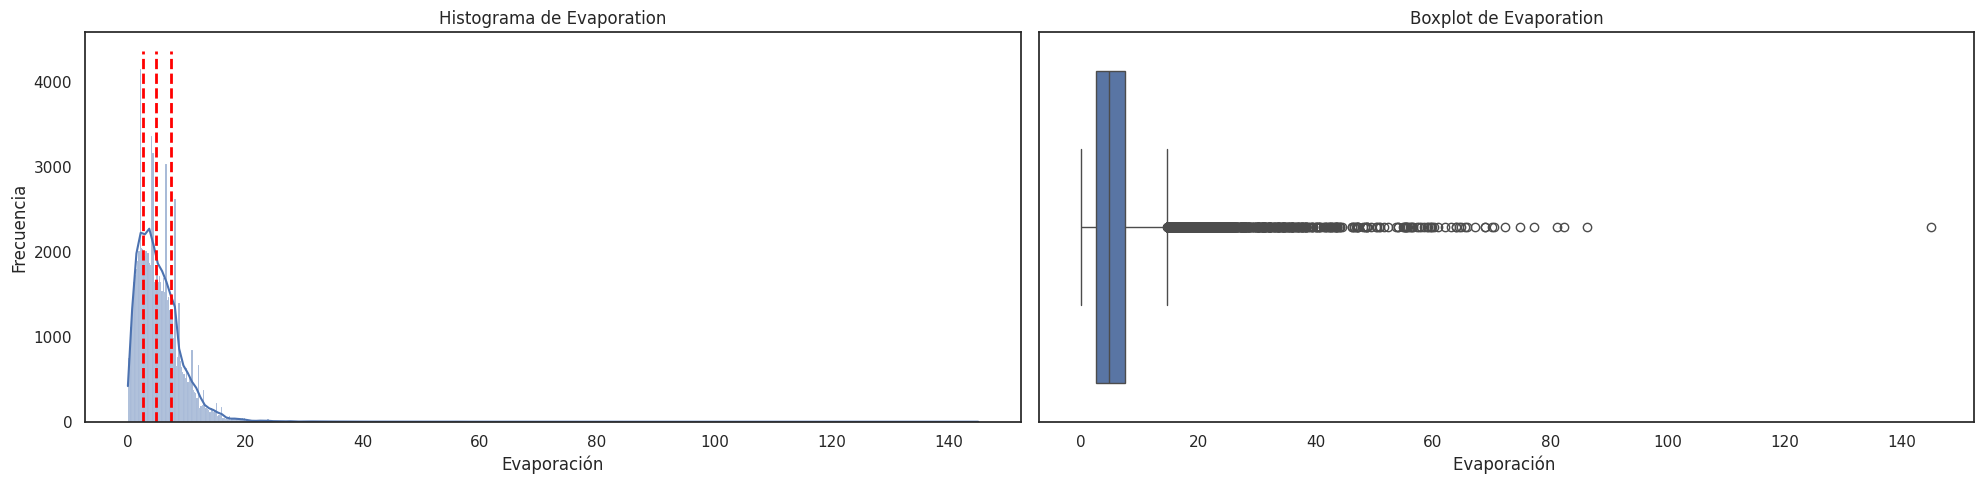

count    82658.000000
mean         5.468616
std          4.193871
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Evaporation'], kde=True, ax=axs[0])

# Calcular cuartiles
q1 = weather_data['Evaporation'].quantile(0.25)
q2 = weather_data['Evaporation'].quantile(0.5)
q3 = weather_data['Evaporation'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

axs[0].set_title('Histograma de Evaporation')
axs[0].set_xlabel('Evaporación')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=weather_data['Evaporation'], ax=axs[1])
axs[1].set_title('Boxplot de Evaporation')
axs[1].set_xlabel('Evaporación ')

plt.tight_layout()
plt.show()

weather_data['Evaporation'].describe()



**Histograma:**

El histograma muestra la distribución de la evaporación en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de las temperaturas máximas se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de evaporación. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos días con niveles de evaporación significativamente altos.

**Interpretación:**

En general, la distribución de la evaporación en los datos meteorológicos presenta una tendencia central, con la mayoría de las mediciones de evaporación concentrándose en 4.8 mm. Sin embargo, la presencia de valores atípicos indica que hay algunos días con niveles de evaporación significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Sunshine

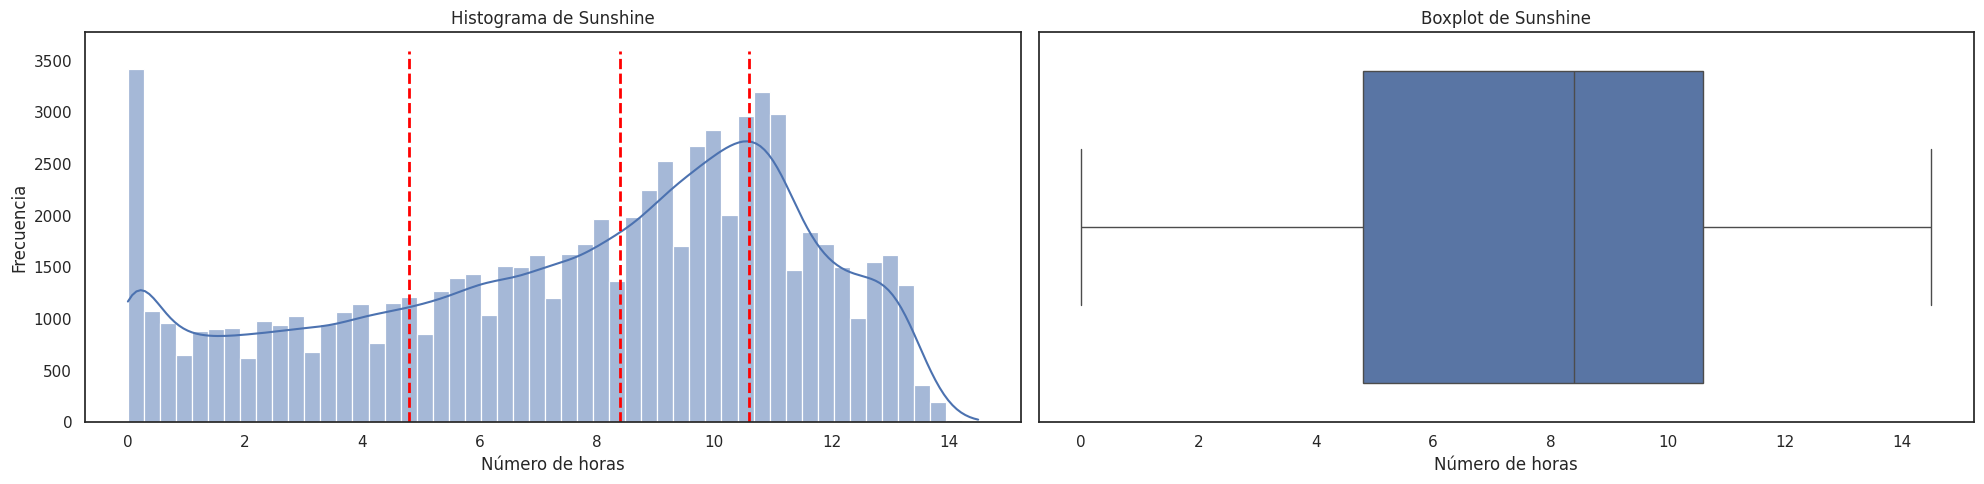

count    75616.000000
mean         7.611241
std          3.785612
min          0.000000
25%          4.800000
50%          8.400000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Sunshine'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Sunshine')
axs[0].set_xlabel('Número de horas')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['Sunshine'].quantile(0.25)
q2 = weather_data['Sunshine'].quantile(0.5)
q3 = weather_data['Sunshine'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['Sunshine'], ax=axs[1])
axs[1].set_title('Boxplot de Sunshine')
axs[1].set_xlabel('Número de horas')

plt.tight_layout()
plt.show()

weather_data['Sunshine'].describe()

**Histograma:**

El histograma muestra la distribución del número de horas de sol en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de las mediciones de horas de sol se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de horas de sol. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de horas de sol no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución del número de horas de sol en los datos meteorológicos presenta una tendencia central, con la mayoría de las mediciones de horas de sol concentrándose alrededor de 8.40 horas. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a horas de sol. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### WindGustDir

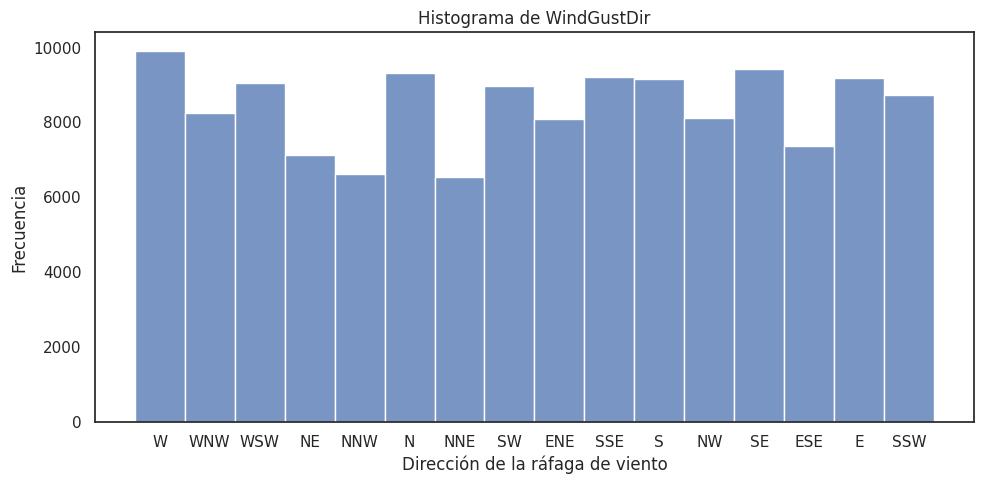

count     135096
unique        16
top            W
freq        9910
Name: WindGustDir, dtype: object

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

# Histograma
sns.histplot(weather_data['WindGustDir'])
axs.set_title('Histograma de WindGustDir')
axs.set_xlabel('Dirección de la ráfaga de viento')
axs.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

weather_data['WindGustDir'].describe()

**Histograma**:

El histograma muestra la distribución de la dirección de las ráfagas de viento en los datos meteorológicos. Se observa que las direcciones de las ráfagas de viento están distribuidas entre 16 categorías diferentes, lo que indica que las ráfagas de viento pueden venir de varias direcciones.

**Interpretación:**

En general, la dirección de las ráfagas de viento en los datos meteorológicos varía entre 16 direcciones diferentes. La dirección más frecuente de las ráfagas de viento es el oeste (W), con una frecuencia de 9910.

### WindGustSpeed

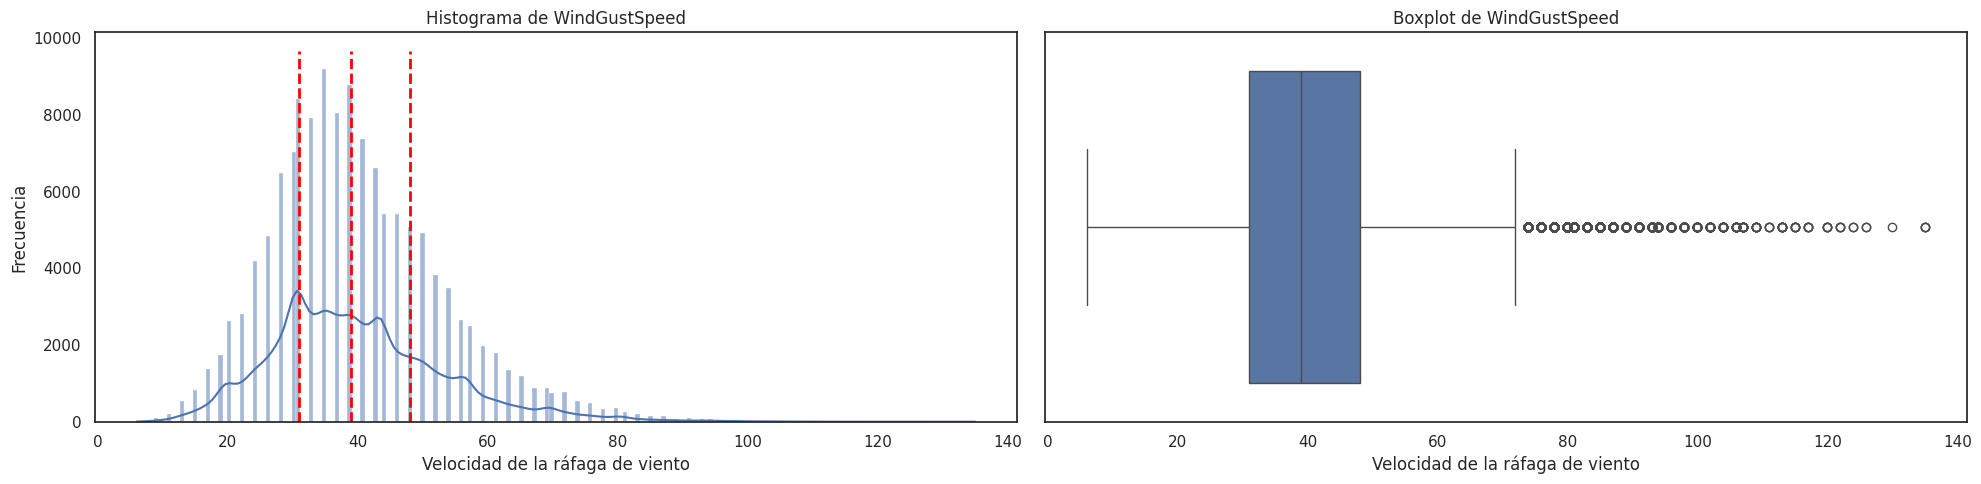

count    135159.000000
mean         40.036564
std          13.607212
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['WindGustSpeed'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de WindGustSpeed')
axs[0].set_xlabel('Velocidad de la ráfaga de viento')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['WindGustSpeed'].quantile(0.25)
q2 = weather_data['WindGustSpeed'].quantile(0.5)
q3 = weather_data['WindGustSpeed'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['WindGustSpeed'], ax=axs[1])
axs[1].set_title('Boxplot de WindGustSpeed')
axs[1].set_xlabel('Velocidad de la ráfaga de viento')

plt.tight_layout()
plt.show()

weather_data['WindGustSpeed'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de las ráfagas de viento en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de las velocidades de las ráfagas de viento se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de velocidad de las ráfagas de viento. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de velocidad de las ráfagas de viento no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la velocidad de las ráfagas de viento en los datos meteorológicos presenta una tendencia central, con la mayoría de las velocidades de las ráfagas de viento concentrándose alrededor de 39.00 km/h. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a velocidades de las ráfagas de viento. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### WindDir9am

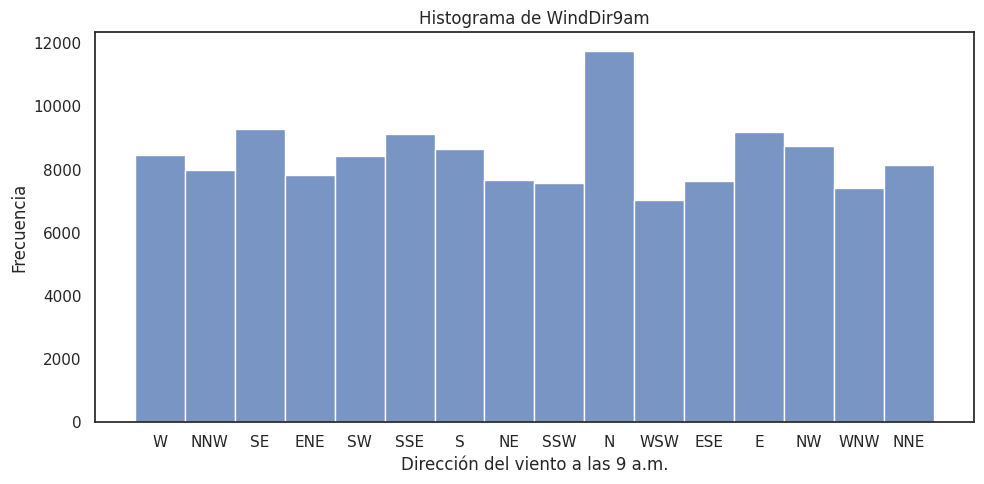

count     134850
unique        16
top            N
freq       11754
Name: WindDir9am, dtype: object

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

# Histograma
sns.histplot(weather_data['WindDir9am'])
axs.set_title('Histograma de WindDir9am')
axs.set_xlabel('Dirección del viento a las 9 a.m.')
axs.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

weather_data['WindDir9am'].describe()

**Histograma:**

El histograma muestra la distribución de la dirección del viento a las 9 a.m. en los datos meteorológicos. Se observa que las direcciones del viento están distribuidas entre 16 categorías diferentes, lo que indica que el viento puede venir de varias direcciones a las 9 a.m.

**Interpretación:**

En general, la dirección del viento a las 9 a.m. en los datos meteorológicos varía entre 16 direcciones diferentes. La dirección más frecuente del viento a las 9 a.m. es el norte (N), con una frecuencia de 11754.

### WindDir3pm

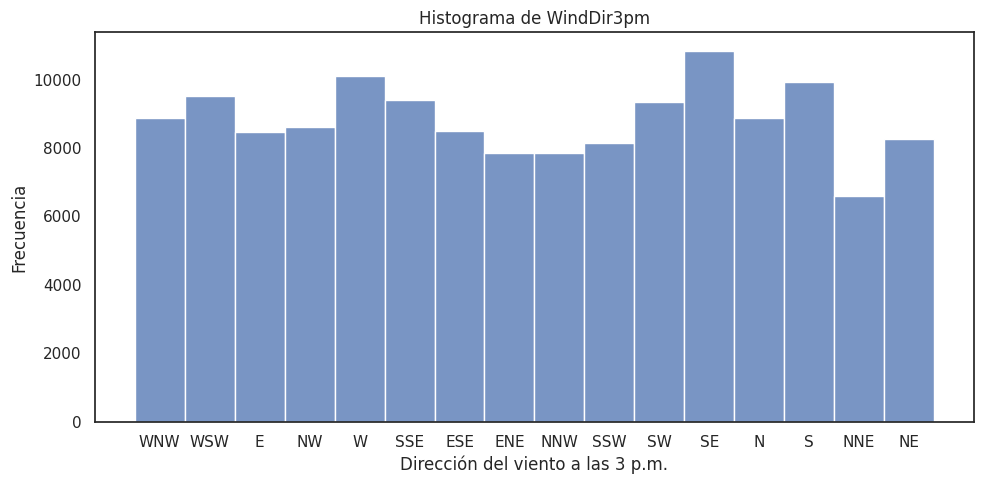

count     141186
unique        16
top           SE
freq       10837
Name: WindDir3pm, dtype: object

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

# Histograma
sns.histplot(weather_data['WindDir3pm'])
axs.set_title('Histograma de WindDir3pm')
axs.set_xlabel('Dirección del viento a las 3 p.m.')
axs.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

weather_data['WindDir3pm'].describe()

**Histograma:**

El histograma muestra la distribución de la dirección del viento a las 3 p.m. en los datos meteorológicos. Se observa que las direcciones del viento están distribuidas entre 16 categorías diferentes, lo que indica que el viento puede venir de varias direcciones a las 3 p.m.

**Interpretación:**

En general, la dirección del viento a las 3 p.m. en los datos meteorológicos varía entre 16 direcciones diferentes. La dirección más frecuente del viento a las 3 p.m. es el sureste (SE), con una frecuencia de 10837.

### WindSpeed9am

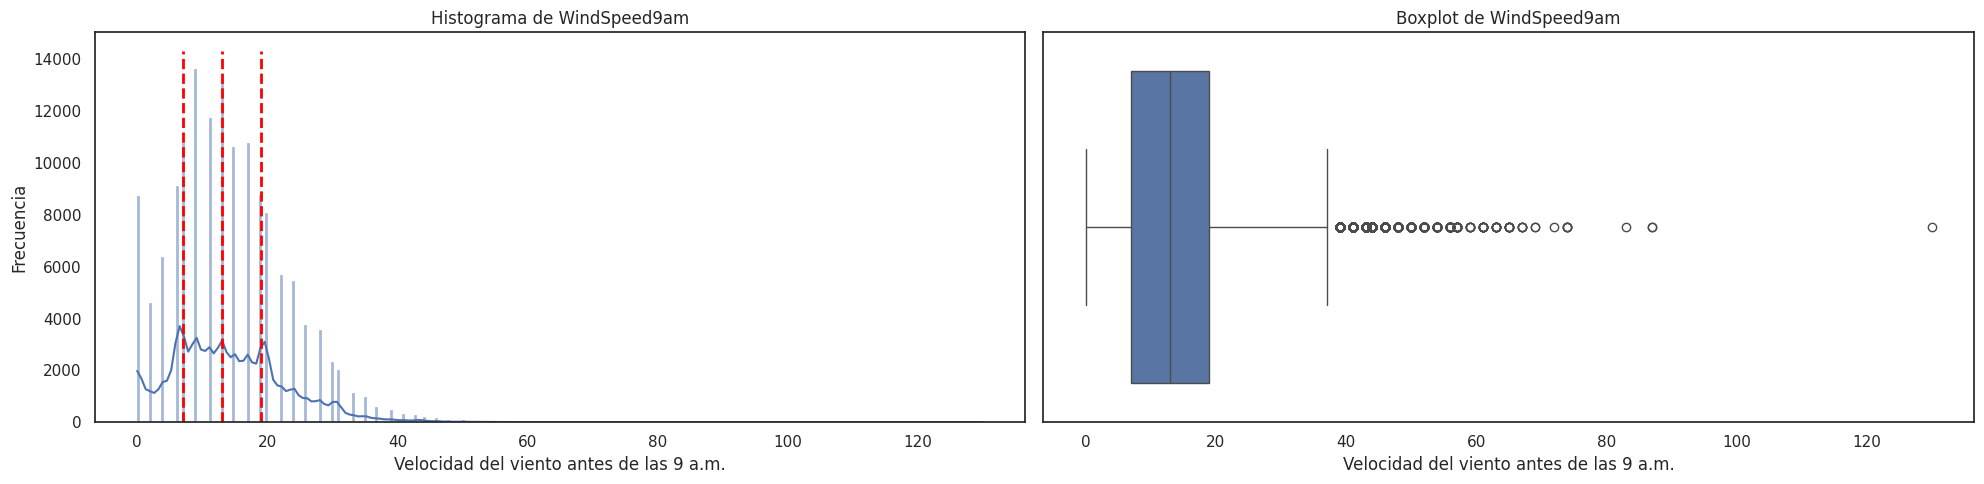

count    143645.000000
mean         14.044742
std           8.915610
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['WindSpeed9am'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de WindSpeed9am')
axs[0].set_xlabel('Velocidad del viento antes de las 9 a.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['WindSpeed9am'].quantile(0.25)
q2 = weather_data['WindSpeed9am'].quantile(0.5)
q3 = weather_data['WindSpeed9am'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['WindSpeed9am'], ax=axs[1])
axs[1].set_title('Boxplot de WindSpeed9am')
axs[1].set_xlabel('Velocidad del viento antes de las 9 a.m.')

plt.tight_layout()
plt.show()

weather_data['WindSpeed9am'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad del viento antes de las 9 a.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de las velocidades del viento se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de velocidad del viento antes de las 9 a.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos días con niveles de viento antes de las 9 a.m. significativamente altos.

**Interpretación:**

En general, la distribución de la velocidad del viento antes de las 9 a.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de las velocidades del viento concentrándose alrededor de 13.00 km/h. Sin embargo, la presencia de valores atípicos indica que hay algunos días con niveles de la velocidades del viento antes de las 9 a.m. significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### WindSpeed3pm

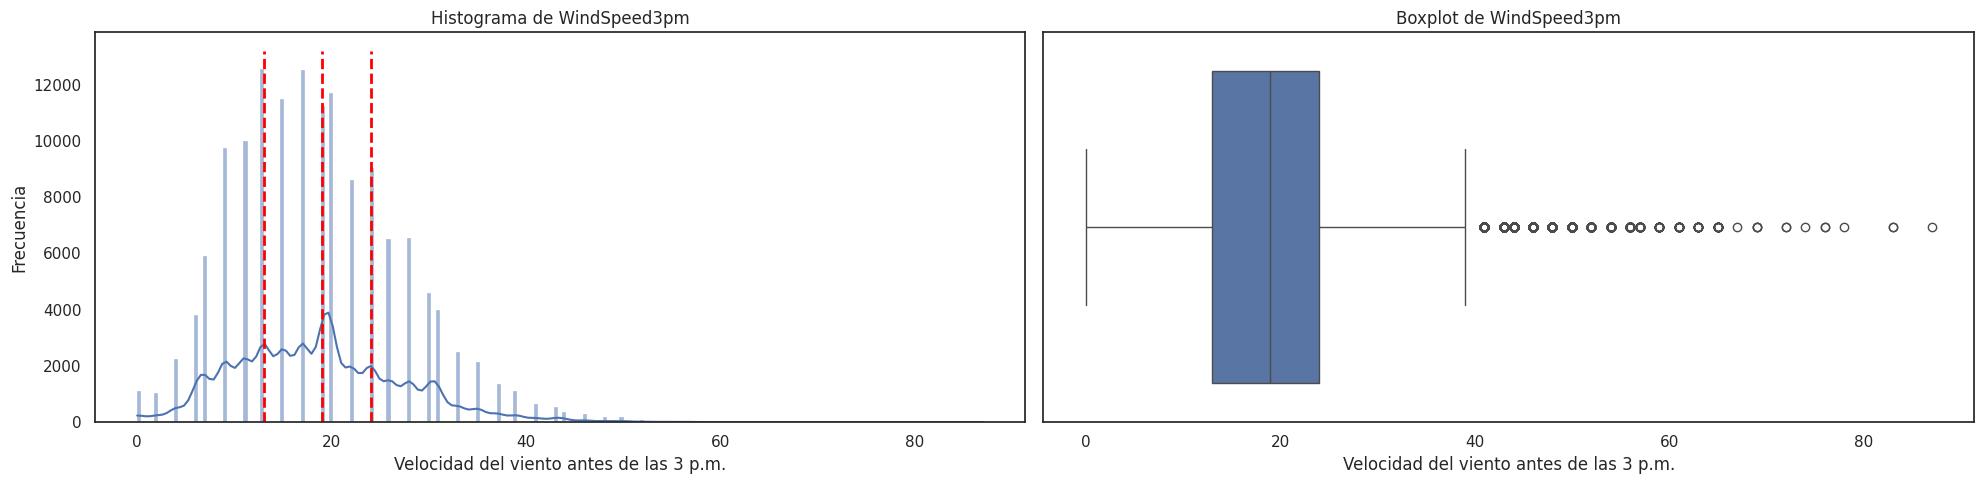

count    142351.000000
mean         18.663164
std           8.810276
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['WindSpeed3pm'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de WindSpeed3pm')
axs[0].set_xlabel('Velocidad del viento antes de las 3 p.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['WindSpeed3pm'].quantile(0.25)
q2 = weather_data['WindSpeed3pm'].quantile(0.5)
q3 = weather_data['WindSpeed3pm'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['WindSpeed3pm'], ax=axs[1])
axs[1].set_title('Boxplot de WindSpeed3pm')
axs[1].set_xlabel('Velocidad del viento antes de las 3 p.m.')

plt.tight_layout()
plt.show()

weather_data['WindSpeed3pm'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad del viento antes de las 3 p.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de las velocidades del viento se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de velocidad del viento antes de las 3 p.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos días con niveles de viento antes de las 3 p.m. significativamente altos.

**Interpretación:**

En general, la distribución de la velocidad del viento antes de las 3 p.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de las velocidades del viento concentrándose alrededor de 19.00 km/h. Sin embargo, la presencia de valores atípicos indica que hay algunos días con niveles de la velocidades del viento antes de las 3 p.m. significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Humidity9am

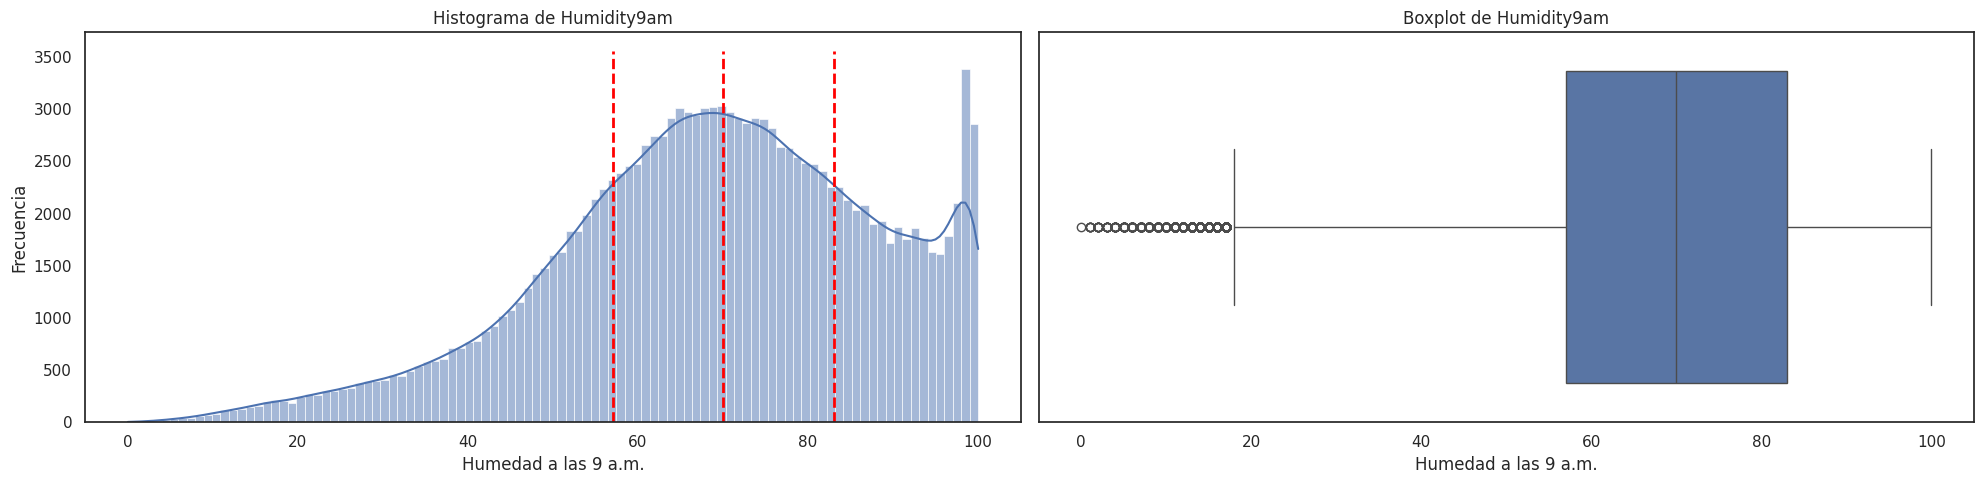

count    142759.000000
mean         68.877290
std          19.029576
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Humidity9am'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Humidity9am')
axs[0].set_xlabel('Humedad a las 9 a.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['Humidity9am'].quantile(0.25)
q2 = weather_data['Humidity9am'].quantile(0.5)
q3 = weather_data['Humidity9am'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['Humidity9am'], ax=axs[1])
axs[1].set_title('Boxplot de Humidity9am')
axs[1].set_xlabel('Humedad a las 9 a.m.')

plt.tight_layout()
plt.show()

weather_data['Humidity9am'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de la humedad a las 9 a.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la humedad a las 9 a.m. se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de velocidad de la humedad a las 9 a.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la humedad a las 9 a.m no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la velocidad de la humedad a las 9 a.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de las velocidades del viento concentrándose alrededor de 70 Hr. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a velocidades de la humedad a las 9 a.m. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Humidity3pm

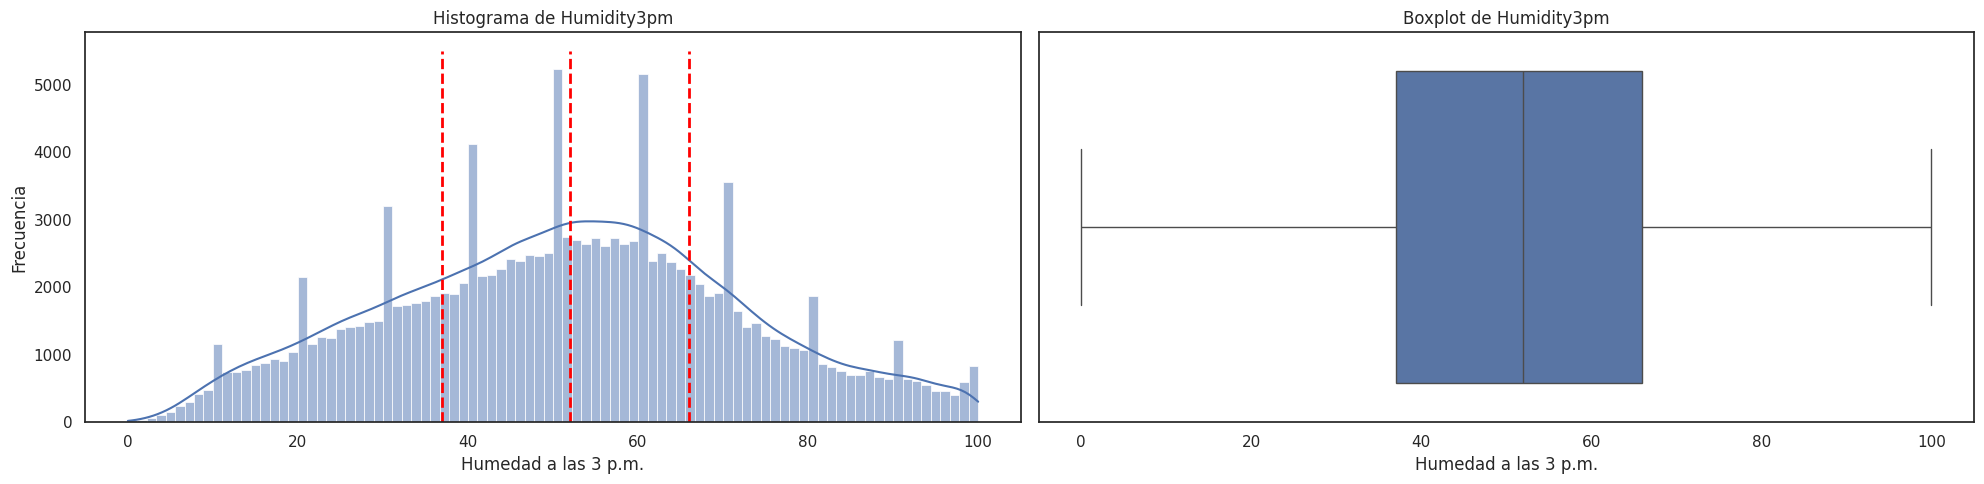

count    140907.000000
mean         51.537432
std          20.796720
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Humidity3pm'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Humidity3pm')
axs[0].set_xlabel('Humedad a las 3 p.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['Humidity3pm'].quantile(0.25)
q2 = weather_data['Humidity3pm'].quantile(0.5)
q3 = weather_data['Humidity3pm'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['Humidity3pm'], ax=axs[1])
axs[1].set_title('Boxplot de Humidity3pm')
axs[1].set_xlabel('Humedad a las 3 p.m.')

plt.tight_layout()
plt.show()

weather_data['Humidity3pm'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de la humedad a las 3 p.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la humedad a las 3 p.m. se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la humedad a las 3 p.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la humedad a las 3 p.m. no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la humedad a las 3 p.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de la humedad a las 3 p.m. concentrándose alrededor de 52 Hr. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a la humedad a las 3 p.m. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Pressure9am

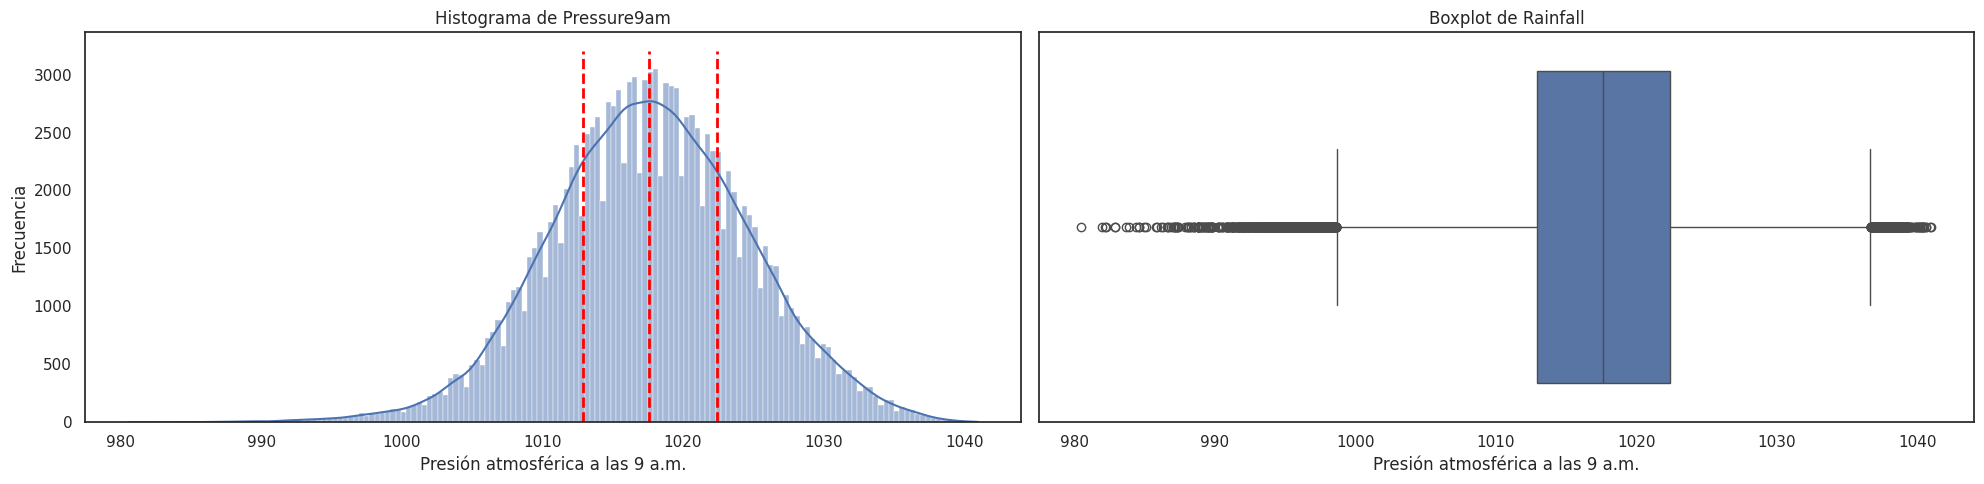

count    130351.000000
mean       1017.649277
std           7.107132
min         980.500000
25%        1012.900000
50%        1017.600000
75%        1022.400000
max        1041.000000
Name: Pressure9am, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Pressure9am'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Pressure9am')
axs[0].set_xlabel('Presión atmosférica a las 9 a.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['Pressure9am'].quantile(0.25)
q2 = weather_data['Pressure9am'].quantile(0.5)
q3 = weather_data['Pressure9am'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['Pressure9am'], ax=axs[1])
axs[1].set_title('Boxplot de Rainfall')
axs[1].set_xlabel('Presión atmosférica a las 9 a.m.')

plt.tight_layout()
plt.show()

weather_data['Pressure9am'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de la presión atmosférica a las 9 a.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la presión atmosférica a las 9 a.m. se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la presión atmosférica a las 9 a.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la presión atmosférica a las 9 a.m. no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la presión atmosférica a las 9 a.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de la presión atmosférica a las 9 a.m. concentrándose alrededor de 1017.6 hPa. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a la presión atmosférica a las 9 a.m. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Pressure3pm

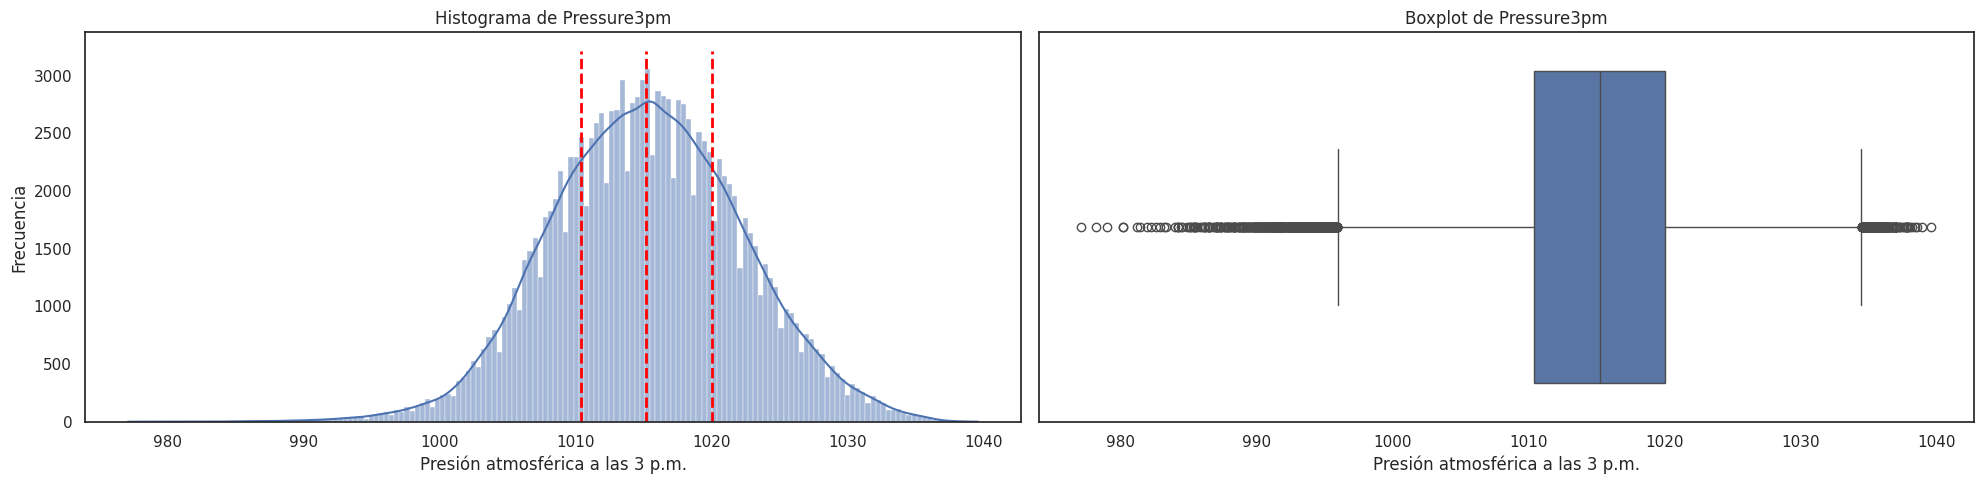

count    130388.000000
mean       1015.255184
std           7.037981
min         977.100000
25%        1010.400000
50%        1015.200000
75%        1020.000000
max        1039.600000
Name: Pressure3pm, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Pressure3pm'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Pressure3pm')
axs[0].set_xlabel('Presión atmosférica a las 3 p.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['Pressure3pm'].quantile(0.25)
q2 = weather_data['Pressure3pm'].quantile(0.5)
q3 = weather_data['Pressure3pm'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['Pressure3pm'], ax=axs[1])
axs[1].set_title('Boxplot de Pressure3pm')
axs[1].set_xlabel('Presión atmosférica a las 3 p.m.')

plt.tight_layout()
plt.show()

weather_data['Pressure3pm'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de la presión atmosférica a las 3 p.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la presión atmosférica a las 3 p.m. se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la presión atmosférica a las 3 p.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la presión atmosférica a las 3 p.m. no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la presión atmosférica a las 3 p.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de la presión atmosférica a las 3 p.m. concentrándose alrededor de 1015.2 hPa. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a la presión atmosférica a las 3 p.m. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Cloud9am

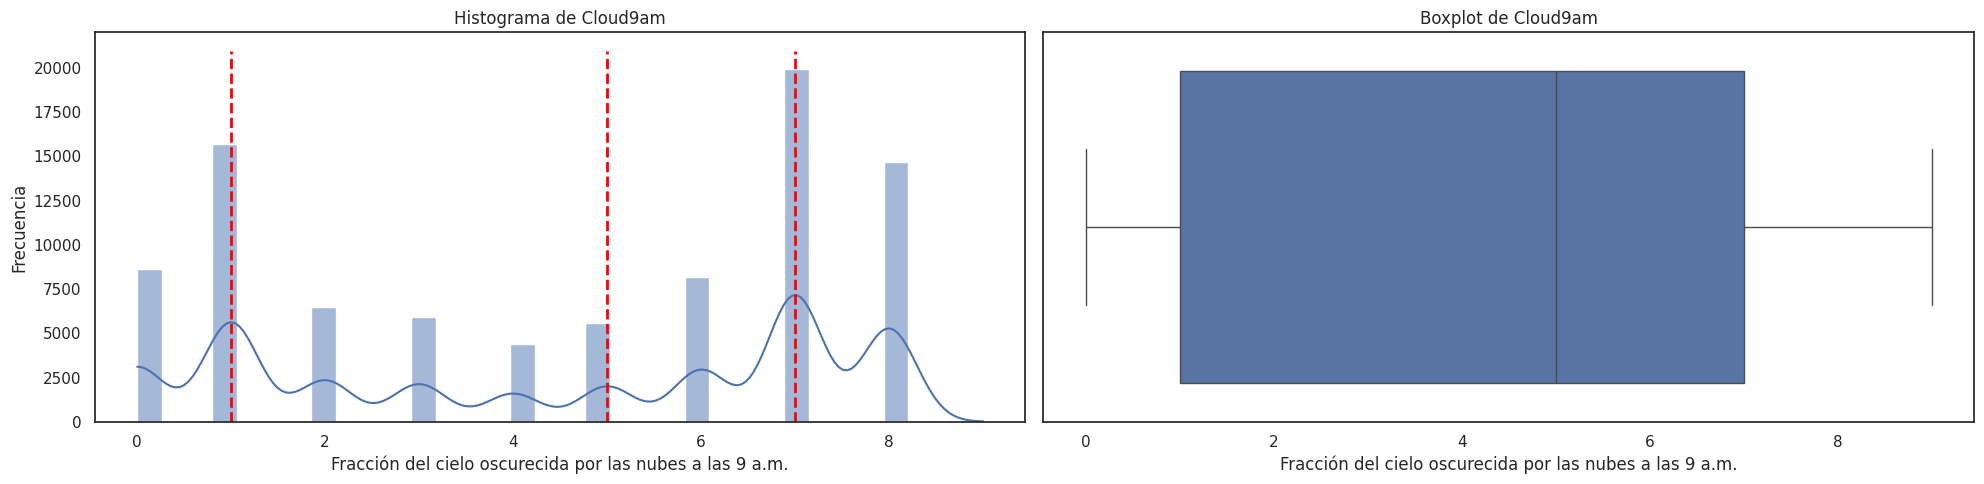

count    89542.000000
mean         4.447287
std          2.887161
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Cloud9am'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Cloud9am')
axs[0].set_xlabel('Fracción del cielo oscurecida por las nubes a las 9 a.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['Cloud9am'].quantile(0.25)
q2 = weather_data['Cloud9am'].quantile(0.5)
q3 = weather_data['Cloud9am'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['Cloud9am'], ax=axs[1])
axs[1].set_title('Boxplot de Cloud9am')
axs[1].set_xlabel('Fracción del cielo oscurecida por las nubes a las 9 a.m.')

plt.tight_layout()
plt.show()

weather_data['Cloud9am'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de la fracción del cielo oscurecida por las nubes a las 9 a.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la fracción del cielo oscurecida por las nubes a las 9 a.m. se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la fracción del cielo oscurecida por las nubes a las 9 a.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la fracción del cielo oscurecida por las nubes a las 9 a.m. no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la fracción del cielo oscurecida por las nubes a las 9 a.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de la fracción del cielo oscurecida por las nubes a las 9 a.m. concentrándose alrededor de 5 oktas (octavos). La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a la fracción del cielo oscurecida por las nubes a las 9 a.m. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Cloud3pm

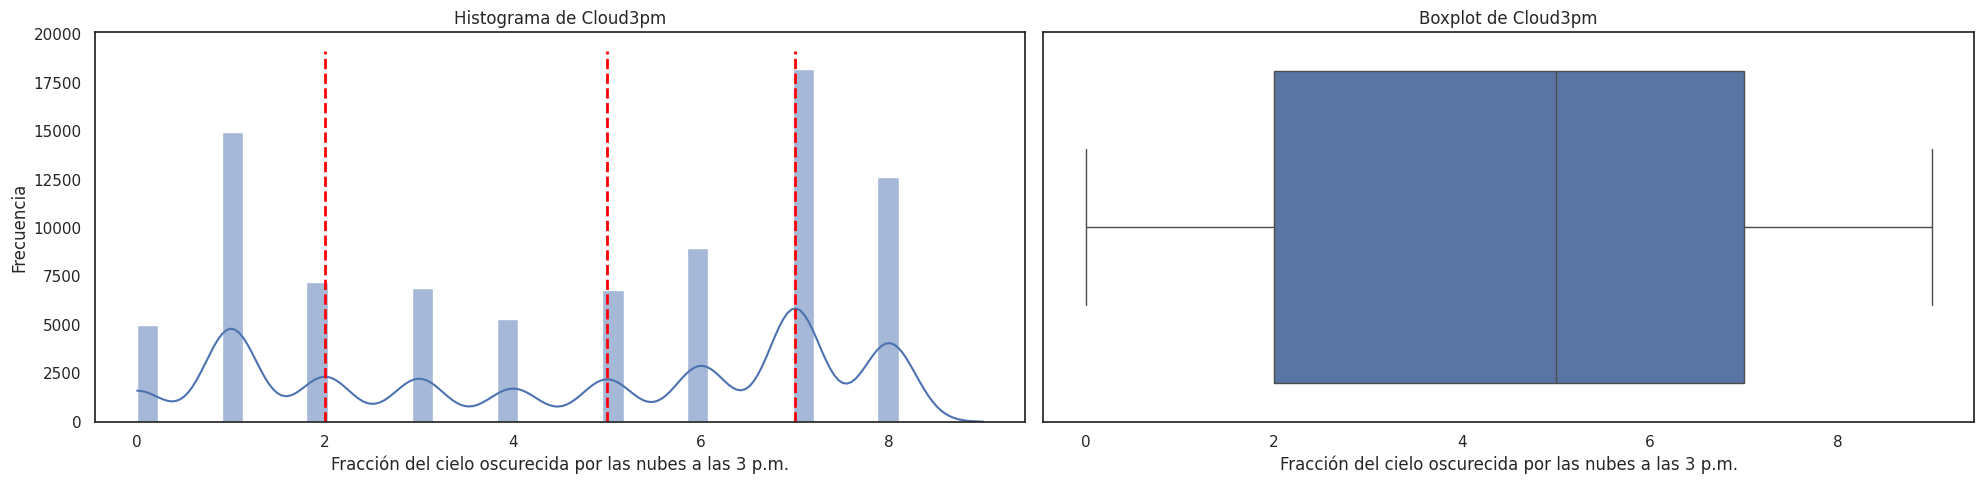

count    86076.000000
mean         4.509770
std          2.720306
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Cloud3pm'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Cloud3pm')
axs[0].set_xlabel('Fracción del cielo oscurecida por las nubes a las 3 p.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['Cloud3pm'].quantile(0.25)
q2 = weather_data['Cloud3pm'].quantile(0.5)
q3 = weather_data['Cloud3pm'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['Cloud3pm'], ax=axs[1])
axs[1].set_title('Boxplot de Cloud3pm')
axs[1].set_xlabel('Fracción del cielo oscurecida por las nubes a las 3 p.m.')

plt.tight_layout()
plt.show()

weather_data['Cloud3pm'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de la fracción del cielo oscurecida por las nubes a las 3 p.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la fracción del cielo oscurecida por las nubes a las 3 p.m. se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la fracción del cielo oscurecida por las nubes a las 3 p.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la fracción del cielo oscurecida por las nubes a las 3 p.m. no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la fracción del cielo oscurecida por las nubes a las 3 p.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de la fracción del cielo oscurecida por las nubes a las 3 p.m. concentrándose alrededor de 5 oktas (octavos). La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a la fracción del cielo oscurecida por las nubes a las 3 p.m. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Temp9am

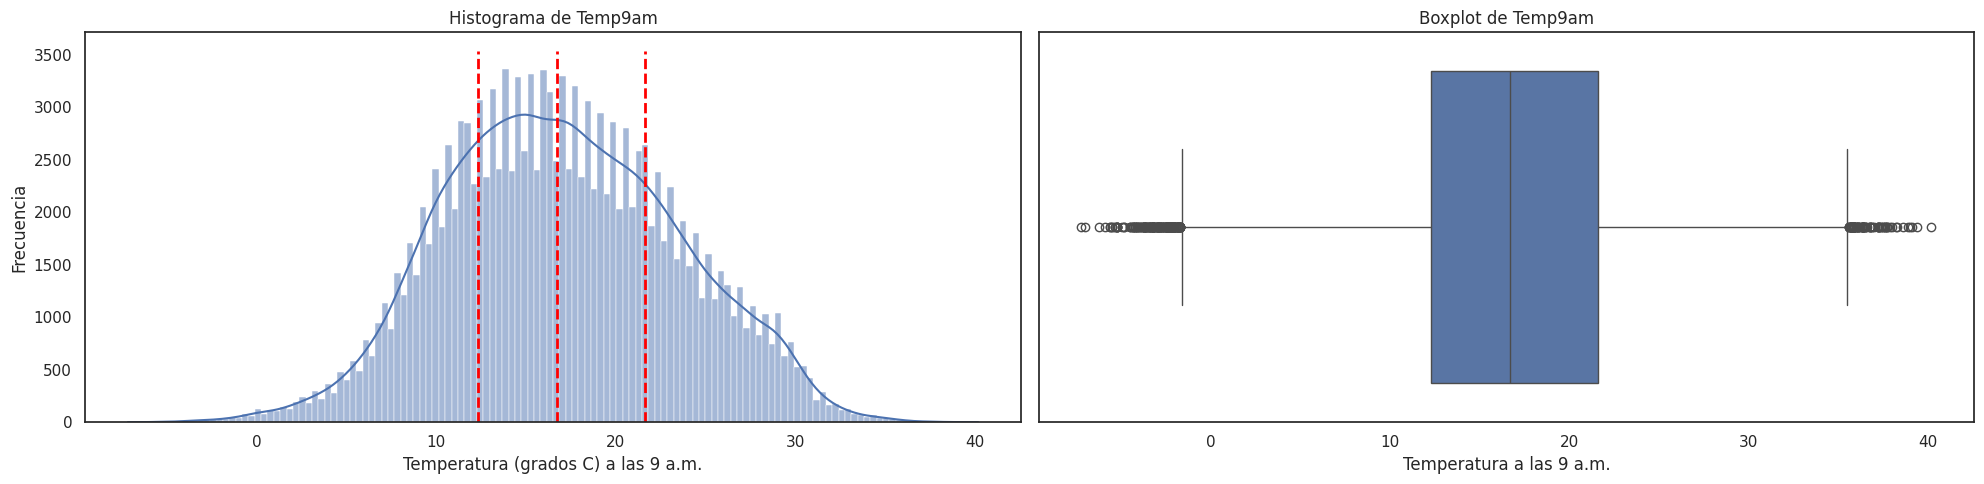

count    143646.000000
mean         16.992780
std           6.488045
min          -7.200000
25%          12.300000
50%          16.700000
75%          21.600000
max          40.200000
Name: Temp9am, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['Temp9am'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Temp9am')
axs[0].set_xlabel('Temperatura (grados C) a las 9 a.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['Temp9am'].quantile(0.25)
q2 = weather_data['Temp9am'].quantile(0.5)
q3 = weather_data['Temp9am'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['Temp9am'], ax=axs[1])
axs[1].set_title('Boxplot de Temp9am')
axs[1].set_xlabel('Temperatura a las 9 a.m.')

plt.tight_layout()
plt.show()

weather_data['Temp9am'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de la temperatura a las 9 a.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la temperatura a las 9 a.m. se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la temperatura a las 9 a.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la temperatura a las 9 a.m. no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la temperatura a las 9 a.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de la temperatura a las 9 a.m. concentrándose alrededor de 16.7 °C. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a la temperatura a las 9 a.m. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### Temp3pm

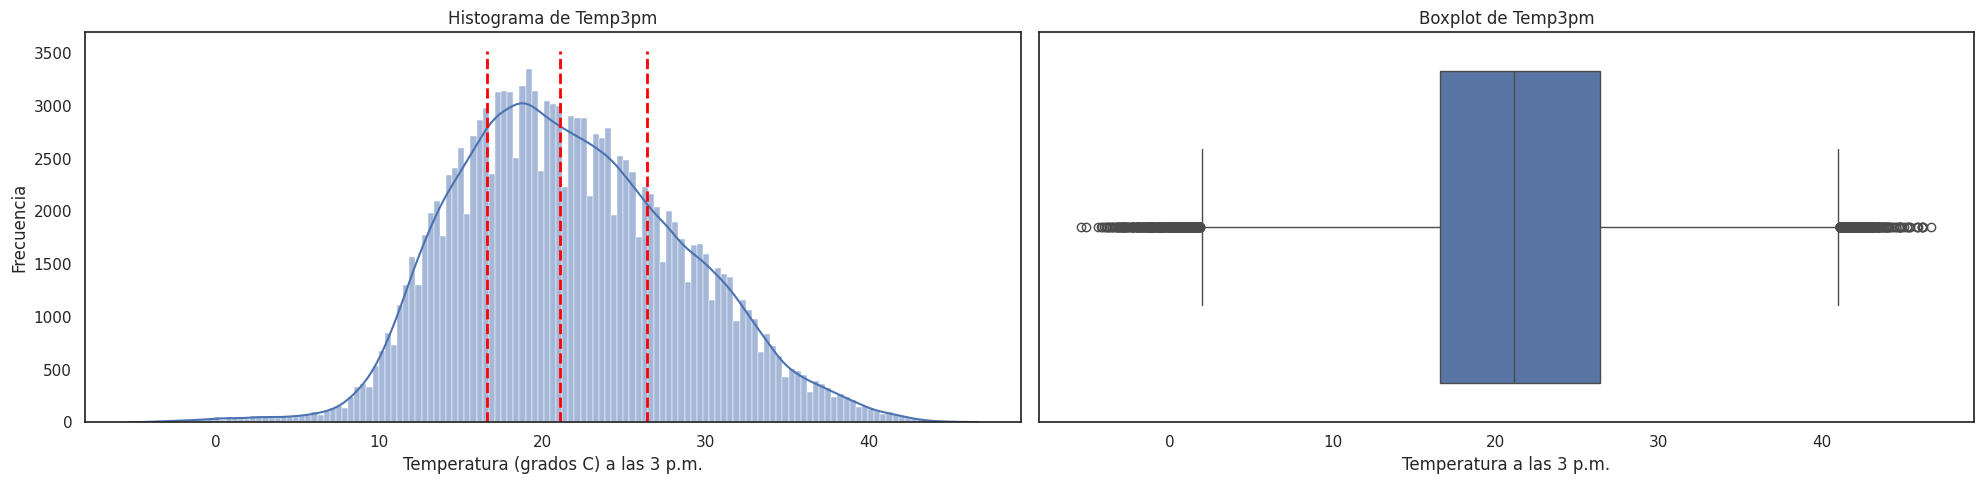

count    141805.000000
mean         21.685249
std           6.936358
min          -5.400000
25%          16.600000
50%          21.100000
75%          26.400000
max          46.700000
Name: Temp3pm, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))


# Histograma
sns.histplot(weather_data['Temp3pm'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Temp3pm')
axs[0].set_xlabel('Temperatura (grados C) a las 3 p.m.')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = weather_data['Temp3pm'].quantile(0.25)
q2 = weather_data['Temp3pm'].quantile(0.5)
q3 = weather_data['Temp3pm'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=weather_data['Temp3pm'], ax=axs[1])
axs[1].set_title('Boxplot de Temp3pm')
axs[1].set_xlabel('Temperatura a las 3 p.m.')

plt.tight_layout()
plt.show()

weather_data['Temp3pm'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de la temperatura a las 3 p.m. en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la temperatura a las 3 p.m. se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la temperatura a las 3 p.m. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la temperatura a las 3 p.m. no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de la temperatura a las 3 p.m. en los datos meteorológicos presenta una tendencia central, con la mayoría de la temperatura a las 3 p.m. concentrándose alrededor de 21.1 °C. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a la temperatura a las 3 p.m. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

### RainToday

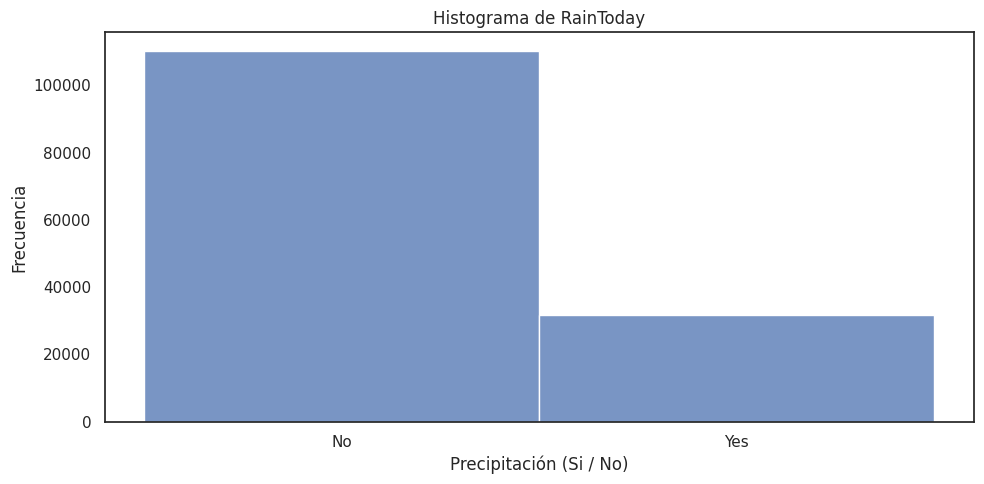

count     142152
unique         2
top           No
freq      110276
Name: RainToday, dtype: object

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

# Histograma
sns.histplot(weather_data['RainToday'])
axs.set_title('Histograma de RainToday')
axs.set_xlabel('Precipitación (Si / No)')
axs.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

weather_data['RainToday'].describe()

### RainTomorrow

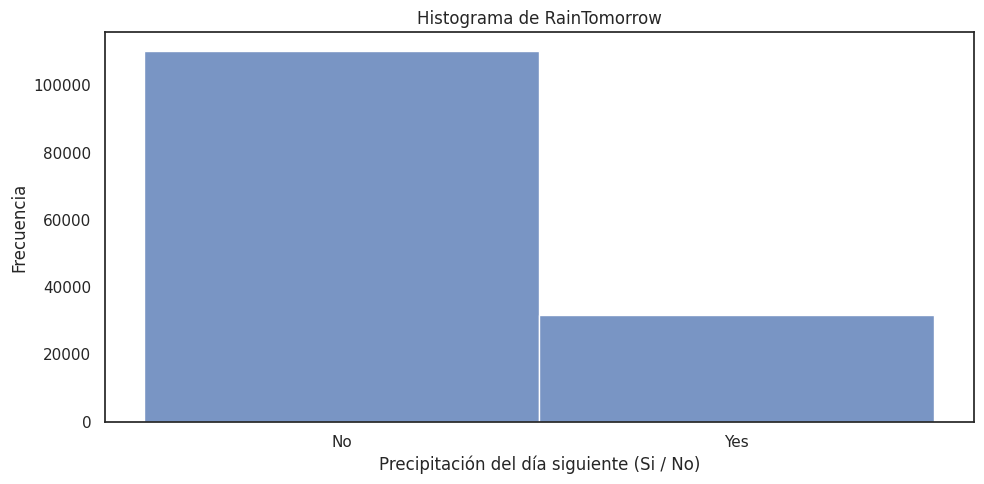

count     142153
unique         2
top           No
freq      110281
Name: RainTomorrow, dtype: object

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

# Histograma
sns.histplot(weather_data['RainTomorrow'])
axs.set_title('Histograma de RainTomorrow')
axs.set_xlabel('Precipitación del día siguiente (Si / No)')
axs.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

weather_data['RainTomorrow'].describe()

### RainfallTomorrow

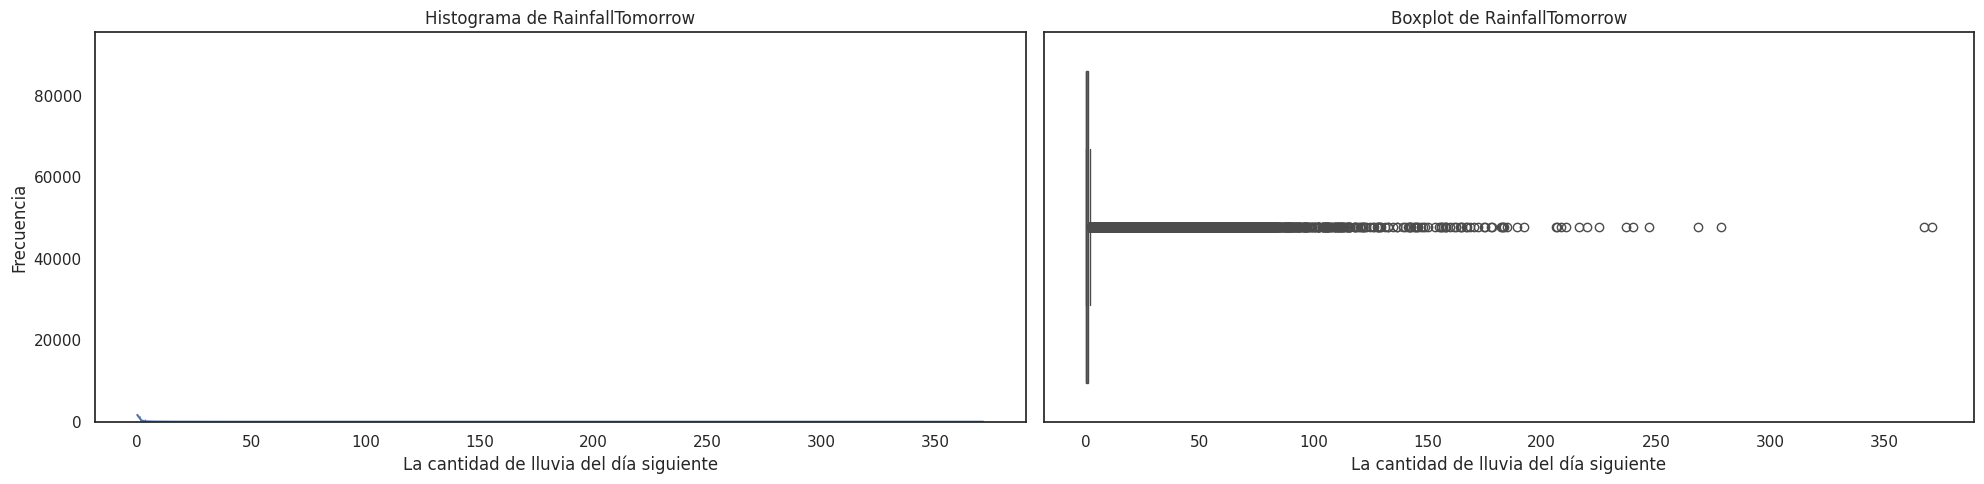

count    142153.000000
mean          2.361242
std           8.479084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: RainfallTomorrow, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(weather_data['RainfallTomorrow'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de RainfallTomorrow')
axs[0].set_xlabel('La cantidad de lluvia del día siguiente')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=weather_data['RainfallTomorrow'], ax=axs[1])
axs[1].set_title('Boxplot de RainfallTomorrow')
axs[1].set_xlabel('La cantidad de lluvia del día siguiente')

plt.tight_layout()
plt.show()

weather_data['RainfallTomorrow'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad de la cantidad de lluvia del día siguiente en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la cantidad de lluvia del día siguiente se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la cantidad de lluvia del día siguiente Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos días con niveles de la cantidad de lluvia del día siguiente significativamente altos.

**Interpretación:**

En general, la distribución de la cantidad de lluvia del día siguiente en los datos meteorológicos presenta una tendencia central, con la mayoría de la cantidad de lluvia del día siguiente concentrándose alrededor de 00.0 mm. Sin embargo, la presencia de valores atípicos indica que hay algunos días con niveles de la cantidad de lluvia del día siguiente significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.


### Otros

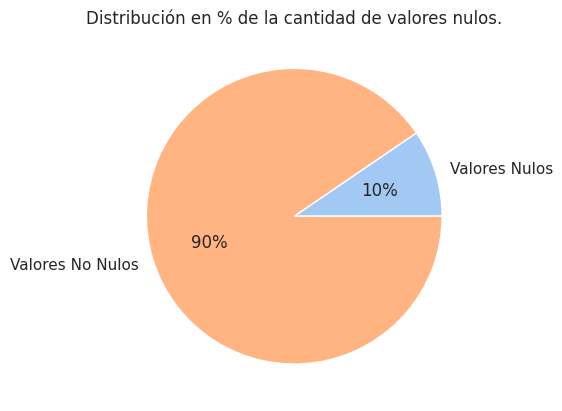

In [ ]:
# Calcula el número total de valores (nulos y no nulos)
total_valores = np.product(weather_data.shape)

# Calcula el número de valores nulos
valores_nulos = weather_data.isnull().sum().sum()

# Calcula el número de valores no nulos
valores_no_nulos = total_valores - valores_nulos

# Crea una lista con los valores para el gráfico
datos = [valores_nulos, valores_no_nulos]

# Crea una lista con las etiquetas para el gráfico
etiquetas = ['Valores Nulos', 'Valores No Nulos']

colors = sns.color_palette("pastel")

plt.title('Distribución en % de la cantidad de valores nulos.')
plt.pie(datos, labels=etiquetas, colors=colors, autopct='%.0f%%')
plt.show()

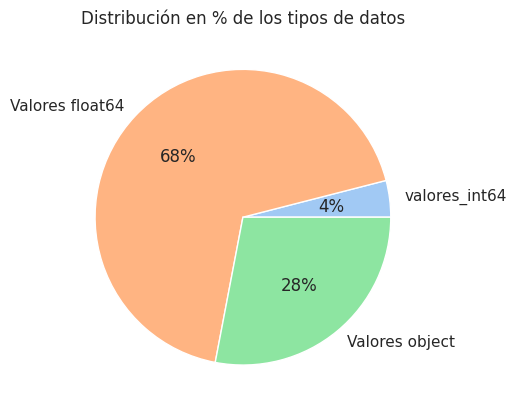

In [ ]:
# Calcula el número de valores que son de tipo int64
valores_int64 = (weather_data.dtypes == 'int64').sum()

# Calcula el número de valores que son de tipo float64
valores_float64 = (weather_data.dtypes == 'float64').sum()

# Calcula el número de valores que son de tipo object
valores_object = (weather_data.dtypes == 'object').sum()

# Crea una lista con los valores para el gráfico
datos = [valores_int64, valores_float64, valores_object]

# Crea una lista con las etiquetas para el gráfico
etiquetas = ['valores_int64', 'Valores float64', 'Valores object']

colors = sns.color_palette("pastel")

plt.title('Distribución en % de los tipos de datos')
plt.pie(datos, labels=etiquetas, colors=colors, autopct='%.0f%%')
plt.show()

## Conclusiones

### Columnas
- Date: Fecha de observación.

        Debemos eliminarla porque no contiene información relevante.
        
- Location: El nombre de la ubicación de la estación meteorológica.

        Debemos descartar todas las ubicaciones que no nos interesen y luego las restantes asumirlas como una misma y única, para poder posteriormente eliminar Location y reducir la dimensionalidad para un modelo más simple.

- MinTemp: La temperatura mínima (°C).
- MaxTemp: La temperatura máxima (°C).

        Deberíamos tener en consideración la posibilidad de añadir a nuestro data set una nueva dimensión la cual sea la temperatura promedio durante el día (PromTemp = MaxTemp - MinTemp)

- Rainfall: La cantidad de lluvia registrada durante el día (mm).
- Evaporation: La evaporación del recipiente Clase A (mm) en el período de 24 horas a las 9 a.m.
- Sunshine: El número de horas de sol brillante en el día.
- WindGustDir: La dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
- WindGustSpeed: La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
- WindDir9am: Dirección del viento a las 9 a.m.
- WindDir3pm: Dirección del viento a las 3 p.m.
- WindSpeed9am: Velocidad del viento (km/h) promediada de las 9 a.m.
- WindSpeed3pm: Velocidad del viento (km/h) promediada de las 3 p.m.
- Humidity9am: Humedad (porcentaje) a las 9 a.m.
- Humidity3pm: Humedad (porcentaje) a las 3 p.m.

        Deberíamos tener en consideración la posibilidad de añadir a nuestro data set una nueva dimensión la cual sea la diferencia de humedad (ΔHumidity = Humidity3pm - Humidity9am)

- Pressure9am: La presión atmosférica (hPa) a las 9 a. m.
- Pressure3pm: La presión atmosférica (hPa) a las 3 p. m.

        Deberíamos tener en consideración la posibilidad de añadir a nuestro data set una nueva dimensión la cual sea la diferencia de presión atmosférica (ΔPressure = Pressure3pm - Pressure9am)

- Cloud9am: Fracción del cielo oscurecida por las nubes a las 9 a.m. Esto se mide en "oktas", que son una unidad de octavos. Registra cuantos
- Cloud3pm: Fracción del cielo oscurecida por las nubes a las 3 p.m. Esto se mide en "oktas", que son una unidad de octavos. Registra cuantos
- Temp9am: Temperatura (grados C) a las 9 a.m.
- Temp3pm: Temperatura (grados C) a las 3 p.m.
- RainToday: Booleano: 1 si la precipitación (mm) en las 24 horas hasta las 9 a. m. excede 1 mm; de lo contrario, 0
- RainTomorrow: Booleano: 1 si la precipitación (mm) en las siguientes 24 horas hasta las 9 a. m. excede 1 mm; de lo contrario, 0

        Debemos eliminarla porque no contiene información relevante para el modelo de regresión lineal.

- RainfallTomorrow: La cantidad de lluvia del día siguiente en mm. Se utiliza para crear la variable de respuesta RainTomorrow. Una especie de medida del "riesgo".

### Outliers

Según nuestro análisis previo, las siguientes columnas presentan valores atípicos: **Rainfall**, **Evaporation**, **WindSpeed9am**, **WindSpeed3pm** y **RainfallTomorrow**. A excepción de **RainfallTomorrow** deberán tratarse todos los valores atípicos encontrados para así evitar que estos puedan sesgar o influir en la estimación de los parámetros del modelo, ya que un solo valor atípico podría arrastrar la línea de regresión hacia sí mismo, lo que resulta en una pendiente y una intersección que no representa correctamente la relación general entre las variables.

Para lograr esto deberemos tener en cuenta que los datos eliminados nunca deberán ser superiores al 10% de los datos totales, ya que si no, podríamos perder información valiosa que podría ser crucial para nuestro análisis. Además, una eliminación excesiva de datos podría llevar a un sesgo en los resultados del modelo. Por lo tanto, es esencial equilibrar la necesidad de limpiar los datos y preservar la integridad de nuestro conjunto de datos.

Sin embargo, cabe aclarar que estos valores atípicos podrían ser un error de Tipo I al rechazar incorrectamente la hipótesis nula de que el punto de datos no es un valor atípico. De igual manera, es necesario llevar a cabo un segundo análisis de valores atípicos posterior a la reducción de dimensionalidad, ya que al solo interesarnos en ciertas ubicaciones, las demás deberán ser descartadas, al igual que las columnas que no proporcionan información relevante para el modelo: Unnamed: 0, Date, Location.

# Reducción de dimensionalidad

In [ ]:
weather_data

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0


**145.412 filas**

Eliminamos las localidades que no nos interesan predecir

In [ ]:
# Lista de ubicaciones deseadas
ubicaciones_deseadas = ['Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

# Filtra el DataFrame para que solo contenga las ubicaciones deseadas
weather_data = weather_data[weather_data['Location'].isin(ubicaciones_deseadas)]

In [ ]:
weather_data

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,6051,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,102547,2017-06-20,MountGambier,6.2,16.3,0.0,NaN,NaN,N,41.0,...,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0
102516,102548,2017-06-21,MountGambier,8.7,13.2,2.0,NaN,NaN,S,20.0,...,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0
102517,102549,2017-06-22,MountGambier,7.0,15.7,0.0,NaN,NaN,N,31.0,...,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0
102518,102550,2017-06-23,MountGambier,5.4,16.2,0.0,NaN,NaN,N,37.0,...,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2


**28.233 filas**

Dejamos a un lado las siguientes columnas:
- Location:

         No la utilizaremos a esta columna, ya que vamos a tomar las ubicaciones: 'Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport' como la si fueran una misma y así simplificar el modelo.

- Unnamed: 0:

         No la utilizaremos a esta columna, ya que no aporta nada de información al modelo.
        
- RainTomorrow:

         No la utilizaremos a esta columna, ya que no contiene información relevante para el modelo de regresión lineal.


In [ ]:
weather_data = weather_data.drop(['Unnamed: 0', 'Location'], axis=1)

weather_data

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,2017-06-20,6.2,16.3,0.0,NaN,NaN,N,41.0,N,NW,...,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0
102516,2017-06-21,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,SE,...,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0
102517,2017-06-22,7.0,15.7,0.0,NaN,NaN,N,31.0,N,NNW,...,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0
102518,2017-06-23,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,W,...,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2


# Train y Test

Dividimos el set de datos en train y test antes de realizar la imputación de nulos para evitar la generación de un data leakage

Esto lo hacemos a través de la fecha, ya que de este modo podemos mantener la integridad temporal de nuestros datos. Al dividir los datos en conjuntos de entrenamiento y prueba basándonos en una fecha específica, estamos respetando el orden cronológico de los eventos. Esto es especialmente importante en series temporales y en problemas donde la secuencia y la temporalidad importan.

Por otro lado, si utilizáramos train_test_split de manera aleatoria, podríamos terminar con datos de prueba que se filtraron en el conjunto de entrenamiento después de la imputación. Esto podría llevar a un modelo sobreajustado que funciona bien en los datos de entrenamiento, pero falla al generalizar en datos nuevos o futuros.

In [ ]:
# Convierto la columna 'Date' a tipo datetime
weather_data["Date"] = pd.to_datetime(weather_data["Date"])

# Mostrar la primera y última fecha
primera_fecha = weather_data['Date'].min()
ultima_fecha = weather_data['Date'].max()

print("Primera fecha:", primera_fecha)
print("Última fecha:", ultima_fecha)

# Calcular la fecha que abarque el 80% de los datos
fecha_80porciento = weather_data['Date'].quantile(0.8)

print("Fecha que abarca el 80% de los datos:", fecha_80porciento)

Primera fecha: 2007-11-01 00:00:00
Última fecha: 2017-06-24 00:00:00
Fecha que abarca el 80% de los datos: 2015-10-06 00:00:00


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba basados en la fecha
train = weather_data[weather_data['Date'] <= fecha_80porciento]

test = weather_data[weather_data['Date'] > fecha_80porciento]

Ya que la fecha no aporta nada más de valor, procedemos a eliminarla para reducir un poco más la dimensionalidad y así la complejidad de nuestro modelo.

In [ ]:
train = train.drop('Date', axis=1)

test = test.drop('Date', axis=1)

In [ ]:
weather_data

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,2017-06-20,6.2,16.3,0.0,NaN,NaN,N,41.0,N,NW,...,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0
102516,2017-06-21,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,SE,...,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0
102517,2017-06-22,7.0,15.7,0.0,NaN,NaN,N,31.0,N,NNW,...,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0
102518,2017-06-23,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,W,...,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2


**28233  filas**

In [ ]:
train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,NaN,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101888,10.7,25.3,0.0,3.2,8.0,NNW,41.0,N,NNW,20.0,...,37.0,1031.8,1027.6,3.0,NaN,13.1,24.7,No,No,0.0
101889,10.7,29.5,0.0,7.2,8.4,NNW,57.0,NNW,NNW,26.0,...,18.0,1023.6,1019.4,2.0,6.0,22.0,28.2,No,No,0.0
101890,7.8,25.2,0.0,7.2,7.8,W,44.0,NW,WNW,9.0,...,44.0,1021.9,1020.6,NaN,NaN,13.4,24.6,No,No,0.0
101891,8.7,32.4,0.0,4.0,11.4,NW,76.0,N,NNW,17.0,...,15.0,1017.3,1013.8,6.0,1.0,18.4,32.0,No,No,0.0


**28233 * 0.8 = 22590 filas**

In [ ]:
test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
8428,18.4,34.1,0.0,8.2,NaN,S,35.0,S,S,15.0,...,17.0,1026.0,1023.9,1.0,4.0,21.6,33.1,No,No,0.0
8429,15.6,32.0,0.0,7.4,NaN,NE,43.0,ENE,ENE,28.0,...,23.0,1030.3,1027.0,1.0,1.0,18.7,31.0,No,No,0.0
8430,17.8,32.7,0.0,10.6,NaN,S,46.0,NNE,E,17.0,...,19.0,1030.5,1026.5,1.0,1.0,22.2,31.9,No,Yes,2.6
8431,17.5,32.4,2.6,9.2,NaN,ENE,37.0,E,SSE,17.0,...,20.0,1026.9,1022.8,3.0,7.0,23.5,30.5,Yes,Yes,1.6
8432,17.3,28.5,1.6,6.2,NaN,W,54.0,NNE,ENE,17.0,...,42.0,1022.2,1019.5,5.0,3.0,20.3,25.4,Yes,Yes,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,6.2,16.3,0.0,NaN,NaN,N,41.0,N,NW,24.0,...,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0
102516,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,SE,0.0,...,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0
102517,7.0,15.7,0.0,NaN,NaN,N,31.0,N,NNW,13.0,...,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0
102518,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,W,24.0,...,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2


**28233 * 0.2 = 5643  filas**

# Datos faltantes

## Eliminación de datos faltantes de Train

Verificamos si existen filas que contengan solo valores nulos.

In [ ]:
# Contamos el número total de filas que tengan todos sus valores como nulos en train
train_nulas = train.isnull().all(axis=1).sum()

train_nulas

0

Vemos que no tiene una fila donde todos sus valores son nulos, así que hace falta realizar ninguna acción.

## Eliminación de datos faltantes de Test

Verificamos si existen filas que contengan solo valores nulos.

In [ ]:
# Contamos el número total de filas que tengan todos sus valores como nulos en test
test_nulas = test.isnull().all(axis=1).sum()

test_nulas

1

Vemos que si tiene una fila donde todos sus valores son nulos, así que la eliminamos.

In [ ]:
test = test.dropna(how='all')

Verificamos que se haya borrado correctamente y que no queden filas que contengan todos sus valores nulos.

In [ ]:
# Contamos el número total de filas que tengan todos sus valores como nulos en test
test_nulas = test.isnull().all(axis=1).sum()

test_nulas

0

## Separación de datos de Train

Separamos el Dataframe según sean sus datos continuos o categóricos para un mejor tratamiento de los mismo.

In [ ]:
# Separa las columnas categóricas
train_categoricas = train.select_dtypes(include=['object'])

In [ ]:
train_categoricas.dtypes

WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

In [ ]:
# Separa las columnas continuas
train_continuas = train.select_dtypes(include=['float64', 'int64'])

In [ ]:
train_continuas.dtypes

MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustSpeed       float64
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainfallTomorrow    float64
dtype: object

## Separación de datos de Test

Separamos el Dataframe según sean sus datos continuos o categóricos para un mejor tratamiento de los mismo.

In [ ]:
# Separa las columnas categóricas
test_categoricas = test.select_dtypes(include=['object'])

In [ ]:
test_categoricas.dtypes

WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

In [ ]:
# Separa las columnas continuas
test_continuas = test.select_dtypes(include=['float64', 'int64'])

In [ ]:
test_continuas.dtypes

MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustSpeed       float64
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainfallTomorrow    float64
dtype: object

## Completado de datos

**Datos categoricos:** Usaremos la mediana para rellenar los datos faltantes, ya que la mediana es una medida de tendencia central que no se ve afectada por los valores extremos o atípicos que podrían sesgar y distorsionar mis resultados.

**Datos continuos:**  Usaremos la moda para rellenar los datos faltantes, ya que, dado que las variables categóricas no son numéricas, medidas como la media y la mediana no tienen sentido en este contexto.  Al rellenar los datos faltantes con la moda, estoy esencialmente asumiendo que la categoría más común es la más probable de ocurrir en los datos faltantes. Esto puede no ser siempre el caso, pero es una suposición razonable en ausencia de información adicional.

### Completado de datos de Train

Verificamos si existen valores faltantes

In [ ]:
train_categoricas.isnull().sum()

WindGustDir     1571
WindDir9am      1415
WindDir3pm       414
RainToday        742
RainTomorrow     742
dtype: int64

Vemos que si hay datos faltantes, por lo tanto, rellenamos los datos faltantes con la moda.

In [ ]:
for columna in train_categoricas.columns:
    train_categoricas[columna].fillna(train_categoricas[columna].mode()[0], inplace=True)

Verificamos que se hayan rellenado los valores faltantes con la moda correctamente y que no queden valores nulos.

In [ ]:
train_categoricas.isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Verificamos si existen valores numéricos faltantes.

In [ ]:
train_continuas.isnull().sum()

MinTemp              357
MaxTemp              344
Rainfall             742
Evaporation         2016
Sunshine            3962
WindGustSpeed       1568
WindSpeed9am         350
WindSpeed3pm         336
Humidity9am          605
Humidity3pm          561
Pressure9am          625
Pressure3pm          618
Cloud9am            7179
Cloud3pm            7469
Temp9am              372
Temp3pm              366
RainfallTomorrow     742
dtype: int64

Rellenamos los datos faltantes con la mediana.

In [ ]:
train_continuas = train_continuas.fillna(train_continuas.median())

Verificamos que se hayan rellenado los valores faltantes con la mediana correctamente y que no queden valores nulos.

In [ ]:
train_continuas.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainfallTomorrow    0
dtype: int64

### Completado de datos de Test

Verificamos si existen valores categoricos faltantes.

In [ ]:
test_categoricas.isnull().sum()

WindGustDir      73
WindDir9am      232
WindDir3pm       22
RainToday       243
RainTomorrow    242
dtype: int64

Vemos que si hay datos faltantes, por lo tanto, rellenamos los datos faltantes con la moda.

In [ ]:
for columna in test_categoricas.columns:
    test_categoricas[columna].fillna(test_categoricas[columna].mode()[0], inplace=True)


Verificamos que se hayan rellenado los valores faltantes con la moda correctamente y que no queden valores nulos.

In [ ]:
test_categoricas.isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Verificamos si existen valores numéricos faltantes.

In [ ]:
test_continuas.isnull().sum()

MinTemp              212
MaxTemp              213
Rainfall             243
Evaporation         2336
Sunshine            2750
WindGustSpeed         73
WindSpeed9am           7
WindSpeed3pm           3
Humidity9am          334
Humidity3pm          328
Pressure9am          213
Pressure3pm          210
Cloud9am            2187
Cloud3pm            2080
Temp9am              212
Temp3pm              209
RainfallTomorrow     242
dtype: int64

Rellenamos los datos faltantes con la mediana.

In [ ]:
test_continuas = test_continuas.fillna(test_continuas.median())

Verificamos que se hayan rellenado los valores faltantes con la mediana correctamente y que no queden valores nulos.

In [ ]:
test_continuas.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainfallTomorrow    0
dtype: int64

# Estandarización

In [ ]:
# Crear el estandarizador
scaler = StandardScaler()

## Estandarización de Train

In [ ]:
# Ajustar y transformar los datos
train_estandarizado = scaler.fit_transform(train_continuas)

# Convertir el resultado a un DataFrame
train_estandarizado = pd.DataFrame(train_estandarizado, columns=train_continuas.columns)

In [ ]:
train_estandarizado

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
0,1.215933,2.079155,-0.314848,2.137163,1.521298,0.430991,-0.975070,-0.021531,-2.627700,-1.898636,-1.657851,-1.662427,-1.250081,-0.055960,2.031383,2.077791,-0.314692
1,1.304671,1.115813,-0.314848,2.948921,1.720741,-0.366508,0.387503,-0.133136,-2.089139,-2.152436,-0.752604,-0.585202,-1.663547,-1.851608,0.906131,1.075637,-0.314692
2,0.789993,1.910952,-0.314848,2.311111,1.806216,-0.874008,-0.241377,-1.472398,0.065104,-2.203196,0.015485,-0.655152,0.403784,-1.851608,-0.094094,1.968180,-0.314692
3,1.482146,2.446142,-0.314848,1.789267,1.036936,0.285991,1.540449,-0.579556,-1.442866,-1.441796,-0.834899,-0.990910,-1.663547,0.392952,2.406468,2.312670,-0.314692
4,1.925833,2.568471,-0.314848,1.963215,1.492806,-0.801508,-0.975070,-1.584003,-1.712147,-1.441796,-0.780036,-1.004900,-1.663547,-0.055960,2.477912,2.422281,-0.314692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22585,-0.061887,0.565332,-0.314848,-0.414076,0.296148,-0.076508,0.492316,0.648100,0.926802,-0.680397,1.839696,1.583238,-0.836615,0.392952,-0.379873,0.715488,-0.314692
22586,-0.061887,1.207560,-0.314848,0.745578,0.410115,1.083491,1.121196,1.206126,-1.766003,-1.644836,0.714995,0.436063,-1.250081,0.392952,1.209770,1.263541,-0.314692
22587,-0.576564,0.550041,-0.314848,0.745578,0.239164,0.140991,-0.660630,0.201680,0.872945,-0.325077,0.481825,0.603942,0.403784,0.392952,-0.326289,0.699830,-0.314692
22588,-0.416837,1.651003,-0.314848,-0.182145,1.264871,2.460989,0.177876,2.098968,-0.958162,-1.797116,-0.149105,-0.347373,0.403784,-1.851608,0.566769,1.858569,-0.314692


## Estandarización de Test

In [ ]:
# Ajustar y transformar los datos
test_estandarizado = scaler.fit_transform(test_continuas)

# Convertir el resultado a un DataFrame
test_estandarizado = pd.DataFrame(test_estandarizado, columns=test_continuas.columns)

In [ ]:
test_estandarizado

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
0,1.114136,1.613681,-0.315742,0.848806,0.118663,-0.417499,0.079349,-0.489346,-1.678192,-1.751012,1.124217,1.151124,-2.045275,-0.598874,0.901833,1.744712,-0.315766
1,0.618108,1.307132,-0.315742,0.599204,0.118663,0.169860,1.560624,-0.032169,-1.172583,-1.440642,1.707239,1.582617,-2.045275,-1.971831,0.394038,1.430150,-0.315766
2,1.007845,1.409315,-0.315742,1.597613,0.118663,0.390120,0.307237,-1.403700,-1.453477,-1.647555,1.734356,1.513021,-2.045275,-1.971831,1.006895,1.564962,0.078967
3,0.954699,1.365522,0.078988,1.160809,0.118663,-0.270659,0.307237,-1.175112,-1.790549,-1.595827,1.246245,0.998013,-1.127699,0.774083,1.234527,1.355255,-0.072853
4,0.919268,0.796217,-0.072831,0.224800,0.118663,0.977479,0.307237,-0.946523,-0.161367,-0.457807,0.608988,0.538682,-0.210122,-1.056527,0.674201,0.591320,-0.133581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,-1.047131,-0.984687,-0.315742,-0.087203,0.118663,0.023020,1.104847,0.310713,1.130743,0.990583,1.164893,1.178962,0.248666,0.316431,-1.356980,-0.891613,-0.012125
5638,-0.604248,-1.437211,-0.012104,-0.087203,0.118663,-1.518797,-1.629814,-0.946523,1.636351,1.611322,1.558093,1.763566,0.248666,1.231736,-0.936736,-1.415883,-0.315766
5639,-0.905409,-1.072272,-0.315742,-0.087203,0.118663,-0.711179,-0.148539,-0.489346,1.299279,0.835399,1.259803,0.942337,1.166243,0.316431,-1.129348,-0.981488,-0.315766
5640,-1.188853,-0.999284,-0.315742,-0.087203,0.118663,-0.270659,1.104847,0.539302,1.186922,0.990583,-0.096062,-0.171194,1.166243,-0.598874,-1.759715,-0.981488,0.018239


# One hot enconding (Dummies)

Al tener demasiadas variables categóricas en mi DataFrame, lo que hice fue simplificar la situación agrupándolas. Tenía una columna con direcciones de viento que incluía 16 categorías distintas como 'N', 'NNW', 'NNE', etc. Pero para mi análisis, no necesitaba tanta granularidad, así que decidí agrupar estas 16 categorías en solo 4: 'N', 'S', 'E' y 'W'.

Para hacer esto, creé un diccionario que mapeaba cada una de las 16 categorías a una de las 4 direcciones principales. Luego, utilicé la función map de pandas para aplicar este mapeo a mi columna. De esta manera, pude reducir la cantidad de categorías únicas en mi columna de 16 a solo 4, lo que simplificó mucho mi análisis

## Dummies de Train

In [ ]:
train_categoricas

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6047,SSW,ENE,SW,No,No
6048,S,SSE,SSE,No,No
6049,SE,N,N,No,No
6050,NNE,NNE,NNW,No,No
6051,WNW,WNW,WSW,No,No
...,...,...,...,...,...
101888,NNW,N,NNW,No,No
101889,NNW,NNW,NNW,No,No
101890,W,NW,WNW,No,No
101891,NW,N,NNW,No,No


In [ ]:
diccionario = {
    'N': ['N', 'NNW', 'NNE', 'NE', 'NW'],
    'S': ['S', 'SSW', 'SSE', 'SE', 'SW'],
    'E': ['E', 'ENE', 'ESE'],
    'W': ['W', 'WNW', 'WSW'],
}

# Invertir el diccionario para el mapeo
diccionario_invertido = {valor: clave for clave, lista_valores in diccionario.items() for valor in lista_valores}

# Aplicar la transformación a WindGustDir
train_categoricas['WindGustDir'] = train_categoricas['WindGustDir'].map(diccionario_invertido)

# Aplicar la transformación a WindDir9am
train_categoricas['WindDir9am'] = train_categoricas['WindDir9am'].map(diccionario_invertido)

# Aplicar la transformación a WindDir3pm
train_categoricas['WindDir3pm'] = train_categoricas['WindDir3pm'].map(diccionario_invertido)

train_categoricas

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6047,S,E,S,No,No
6048,S,S,S,No,No
6049,S,N,N,No,No
6050,N,N,N,No,No
6051,W,W,W,No,No
...,...,...,...,...,...
101888,N,N,N,No,No
101889,N,N,N,No,No
101890,W,N,W,No,No
101891,N,N,N,No,No


Usando la función de pandas get_dummies  aplicará One Hot Encoding a las columnas del Dataframe columnas_categoricas. El resultado será un nuevo DataFrame donde cada valor categórico único en cada columna se convierte en una nueva columna y se codifica como 1 o 0.

In [ ]:
train_dummies = pd.get_dummies(train_categoricas).astype('int64')

train_dummies = train_dummies.drop(['RainTomorrow_Yes', 'RainTomorrow_No'], axis=1)

train_dummies

,WindGustDir_E,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_No,RainToday_Yes
6047,0,0,1,0,1,0,0,0,0,0,1,0,1,0
6048,0,0,1,0,0,0,1,0,0,0,1,0,1,0
6049,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6050,0,1,0,0,0,1,0,0,0,1,0,0,1,0
6051,0,0,0,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101888,0,1,0,0,0,1,0,0,0,1,0,0,1,0
101889,0,1,0,0,0,1,0,0,0,1,0,0,1,0
101890,0,0,0,1,0,1,0,0,0,0,0,1,1,0
101891,0,1,0,0,0,1,0,0,0,1,0,0,1,0


Elimino la columna RainToday_No, ya que es una columna redundante porque es perfectamente inversas a RainToday_Yes, es decir, si un día tiene un '1' en RainToday_No, entonces tiene un '0' en RainToday_Yes, y viceversa.

In [ ]:
train_dummies = train_dummies.drop('RainToday_No', axis=1)

train_dummies

,WindGustDir_E,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_Yes
6047,0,0,1,0,1,0,0,0,0,0,1,0,0
6048,0,0,1,0,0,0,1,0,0,0,1,0,0
6049,0,0,1,0,0,1,0,0,0,1,0,0,0
6050,0,1,0,0,0,1,0,0,0,1,0,0,0
6051,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101888,0,1,0,0,0,1,0,0,0,1,0,0,0
101889,0,1,0,0,0,1,0,0,0,1,0,0,0
101890,0,0,0,1,0,1,0,0,0,0,0,1,0
101891,0,1,0,0,0,1,0,0,0,1,0,0,0


## Dummies de Test

In [ ]:
test_categoricas

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
8428,S,S,S,No,No
8429,NE,ENE,ENE,No,No
8430,S,NNE,E,No,Yes
8431,ENE,E,SSE,Yes,Yes
8432,W,NNE,ENE,Yes,Yes
...,...,...,...,...,...
102515,N,N,NW,No,Yes
102516,S,N,SE,Yes,No
102517,N,N,NNW,No,No
102518,N,NNW,W,No,Yes


In [ ]:
diccionario = {
    'N': ['N', 'NNW', 'NNE', 'NE', 'NW'],
    'S': ['S', 'SSW', 'SSE', 'SE', 'SW'],
    'E': ['E', 'ENE', 'ESE'],
    'W': ['W', 'WNW', 'WSW'],
}

# Invertir el diccionario para el mapeo
diccionario_invertido = {valor: clave for clave, lista_valores in diccionario.items() for valor in lista_valores}

# Aplicar la transformación a WindGustDir
test_categoricas['WindGustDir'] = test_categoricas['WindGustDir'].map(diccionario_invertido)

# Aplicar la transformación a WindDir9am
test_categoricas['WindDir9am'] = test_categoricas['WindDir9am'].map(diccionario_invertido)

# Aplicar la transformación a WindDir3pm
test_categoricas['WindDir3pm'] = test_categoricas['WindDir3pm'].map(diccionario_invertido)

test_categoricas


,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
8428,S,S,S,No,No
8429,N,E,E,No,No
8430,S,N,E,No,Yes
8431,E,E,S,Yes,Yes
8432,W,N,E,Yes,Yes
...,...,...,...,...,...
102515,N,N,N,No,Yes
102516,S,N,S,Yes,No
102517,N,N,N,No,No
102518,N,N,W,No,Yes


Usando la función de pandas get_dummies  aplicará One Hot Encoding a las columnas del Dataframe columnas_categoricas. El resultado será un nuevo DataFrame donde cada valor categórico único en cada columna se convierte en una nueva columna y se codifica como 1 o 0.

In [ ]:
test_dummies = pd.get_dummies(test_categoricas).astype('int64')

test_dummies = test_dummies.drop(['RainTomorrow_Yes', 'RainTomorrow_No'], axis=1)

test_dummies

,WindGustDir_E,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_No,RainToday_Yes
8428,0,0,1,0,0,0,1,0,0,0,1,0,1,0
8429,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8430,0,0,1,0,0,1,0,0,1,0,0,0,1,0
8431,1,0,0,0,1,0,0,0,0,0,1,0,0,1
8432,0,0,0,1,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,0,1,0,0,0,1,0,0,0,1,0,0,1,0
102516,0,0,1,0,0,1,0,0,0,0,1,0,0,1
102517,0,1,0,0,0,1,0,0,0,1,0,0,1,0
102518,0,1,0,0,0,1,0,0,0,0,0,1,1,0


Elimino la columna RainToday_No, ya que es una columna redundante porque es perfectamente inversas a RainToday_Yes, es decir, si un día tiene un '1' en RainToday_No, entonces tiene un '0' en RainToday_Yes, y viceversa.

In [ ]:
test_dummies = test_dummies.drop('RainToday_No', axis=1)

test_dummies

,WindGustDir_E,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_Yes
8428,0,0,1,0,0,0,1,0,0,0,1,0,0
8429,0,1,0,0,1,0,0,0,1,0,0,0,0
8430,0,0,1,0,0,1,0,0,1,0,0,0,0
8431,1,0,0,0,1,0,0,0,0,0,1,0,1
8432,0,0,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,0,1,0,0,0,1,0,0,0,1,0,0,0
102516,0,0,1,0,0,1,0,0,0,0,1,0,1
102517,0,1,0,0,0,1,0,0,0,1,0,0,0
102518,0,1,0,0,0,1,0,0,0,0,0,1,0


# Matriz de correlación

## Matriz de correlación numérica

### Matriz de correlación numérica de Train

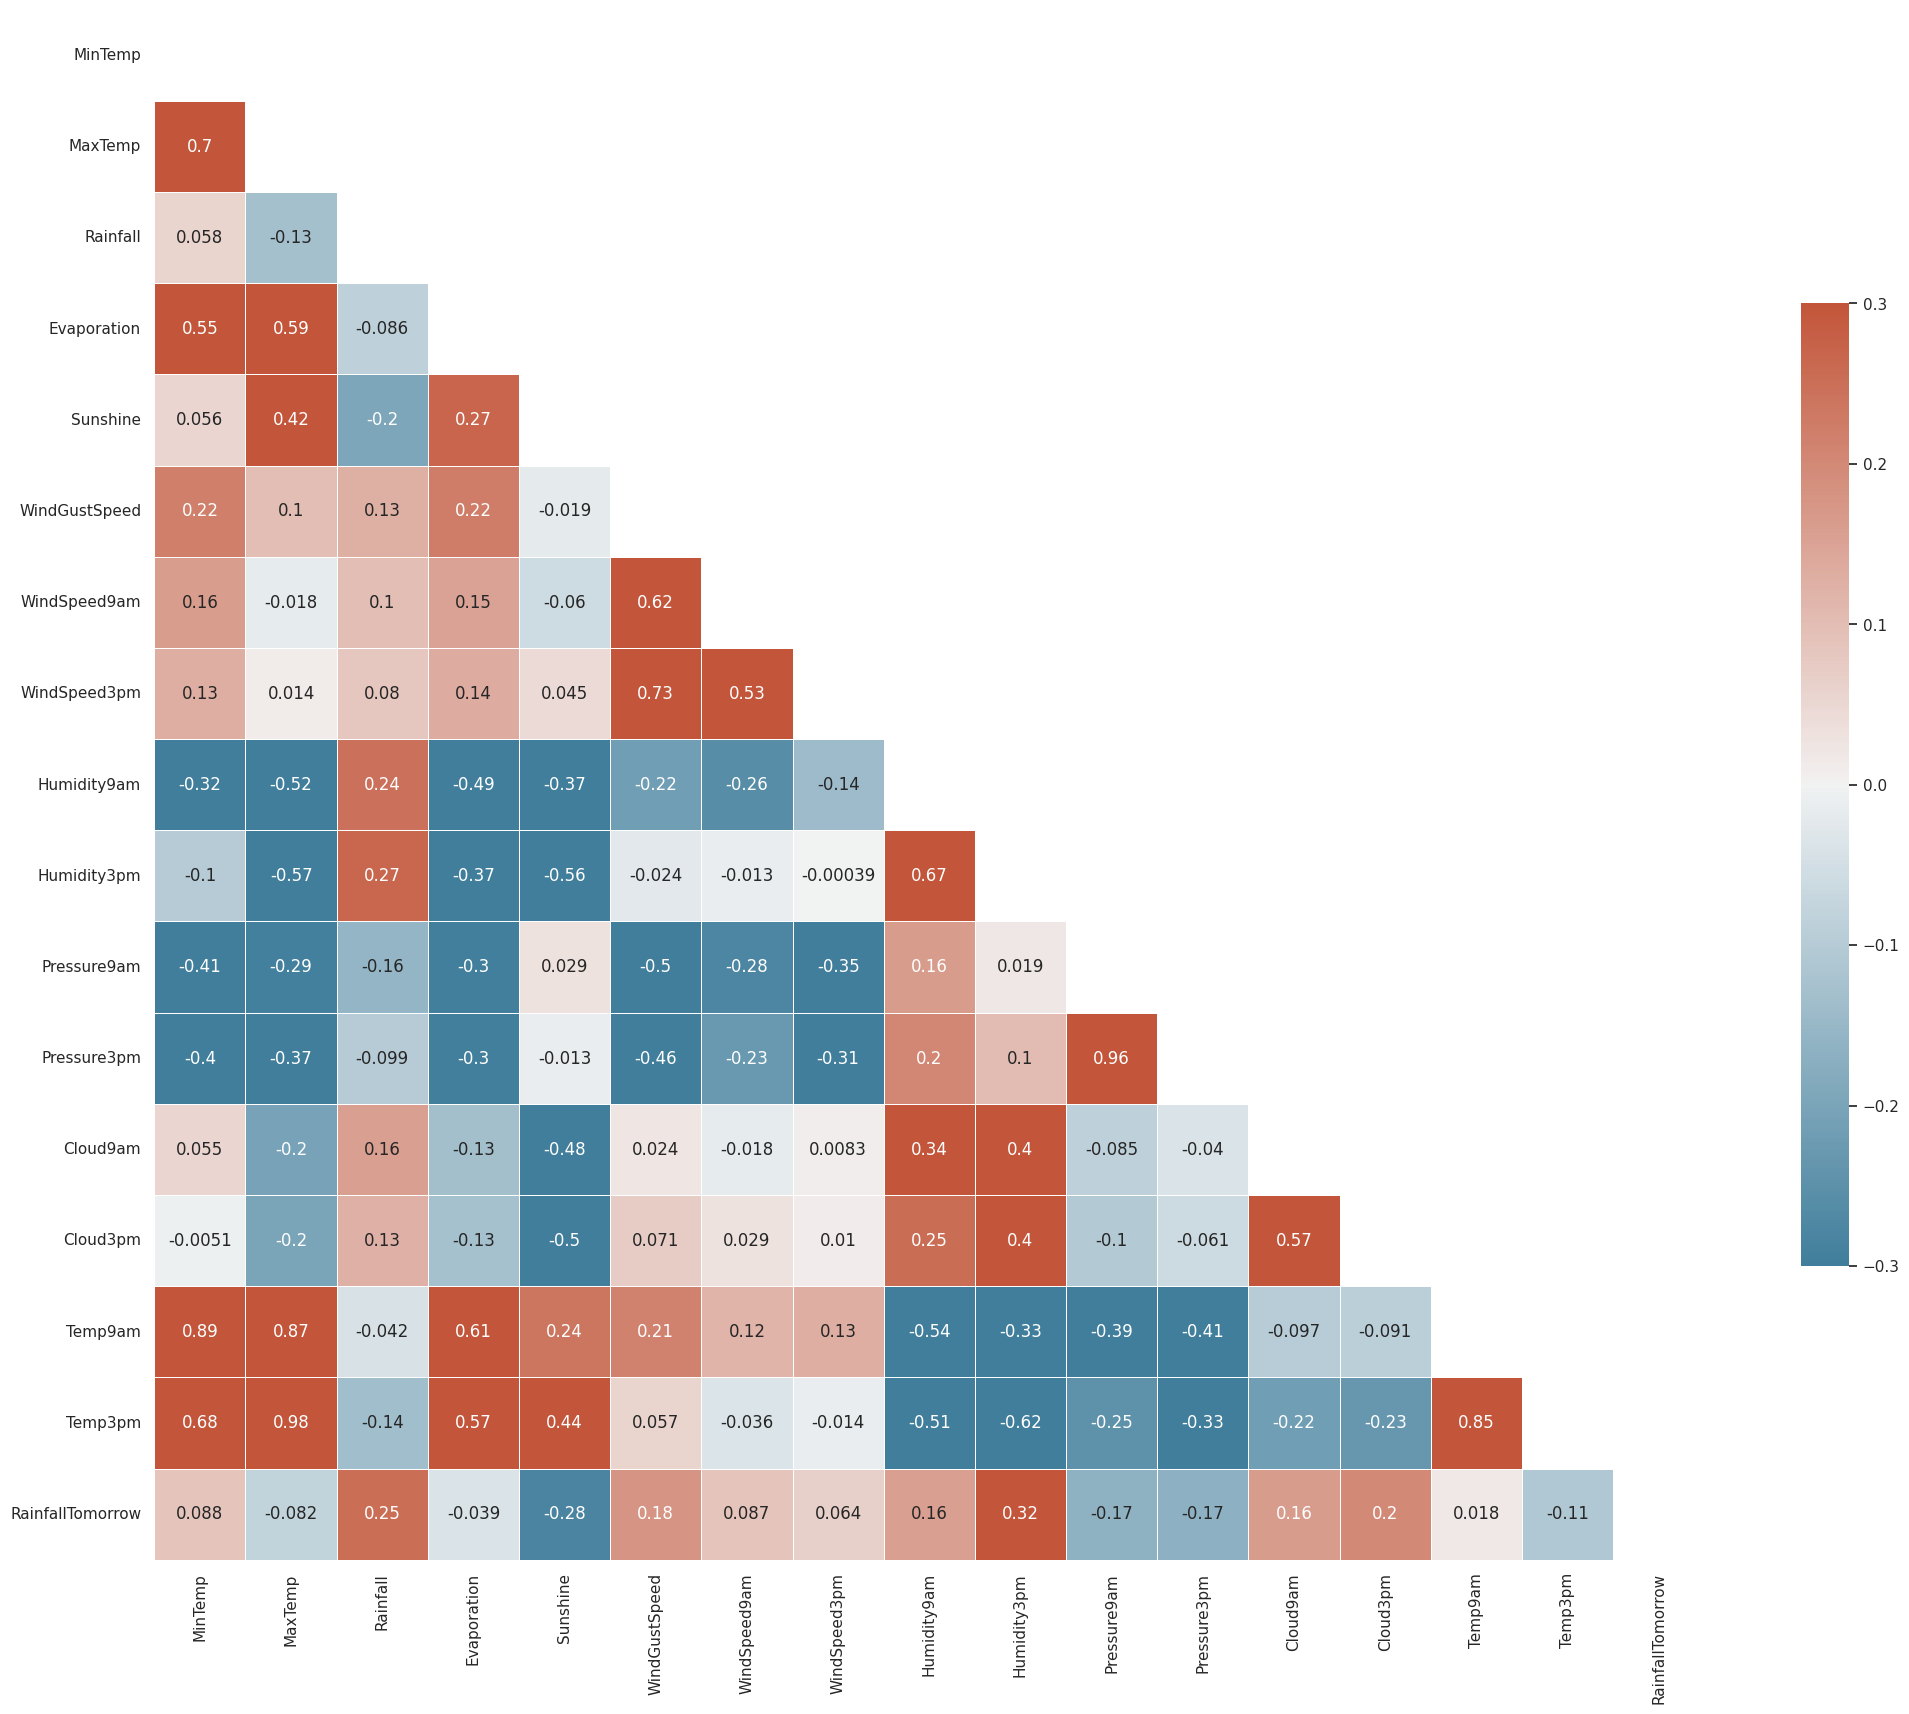

In [ ]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = train_continuas.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.3 ,vmax=.3,center=0, square=True,annot=True ,linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Matriz de correlación numérica de Test

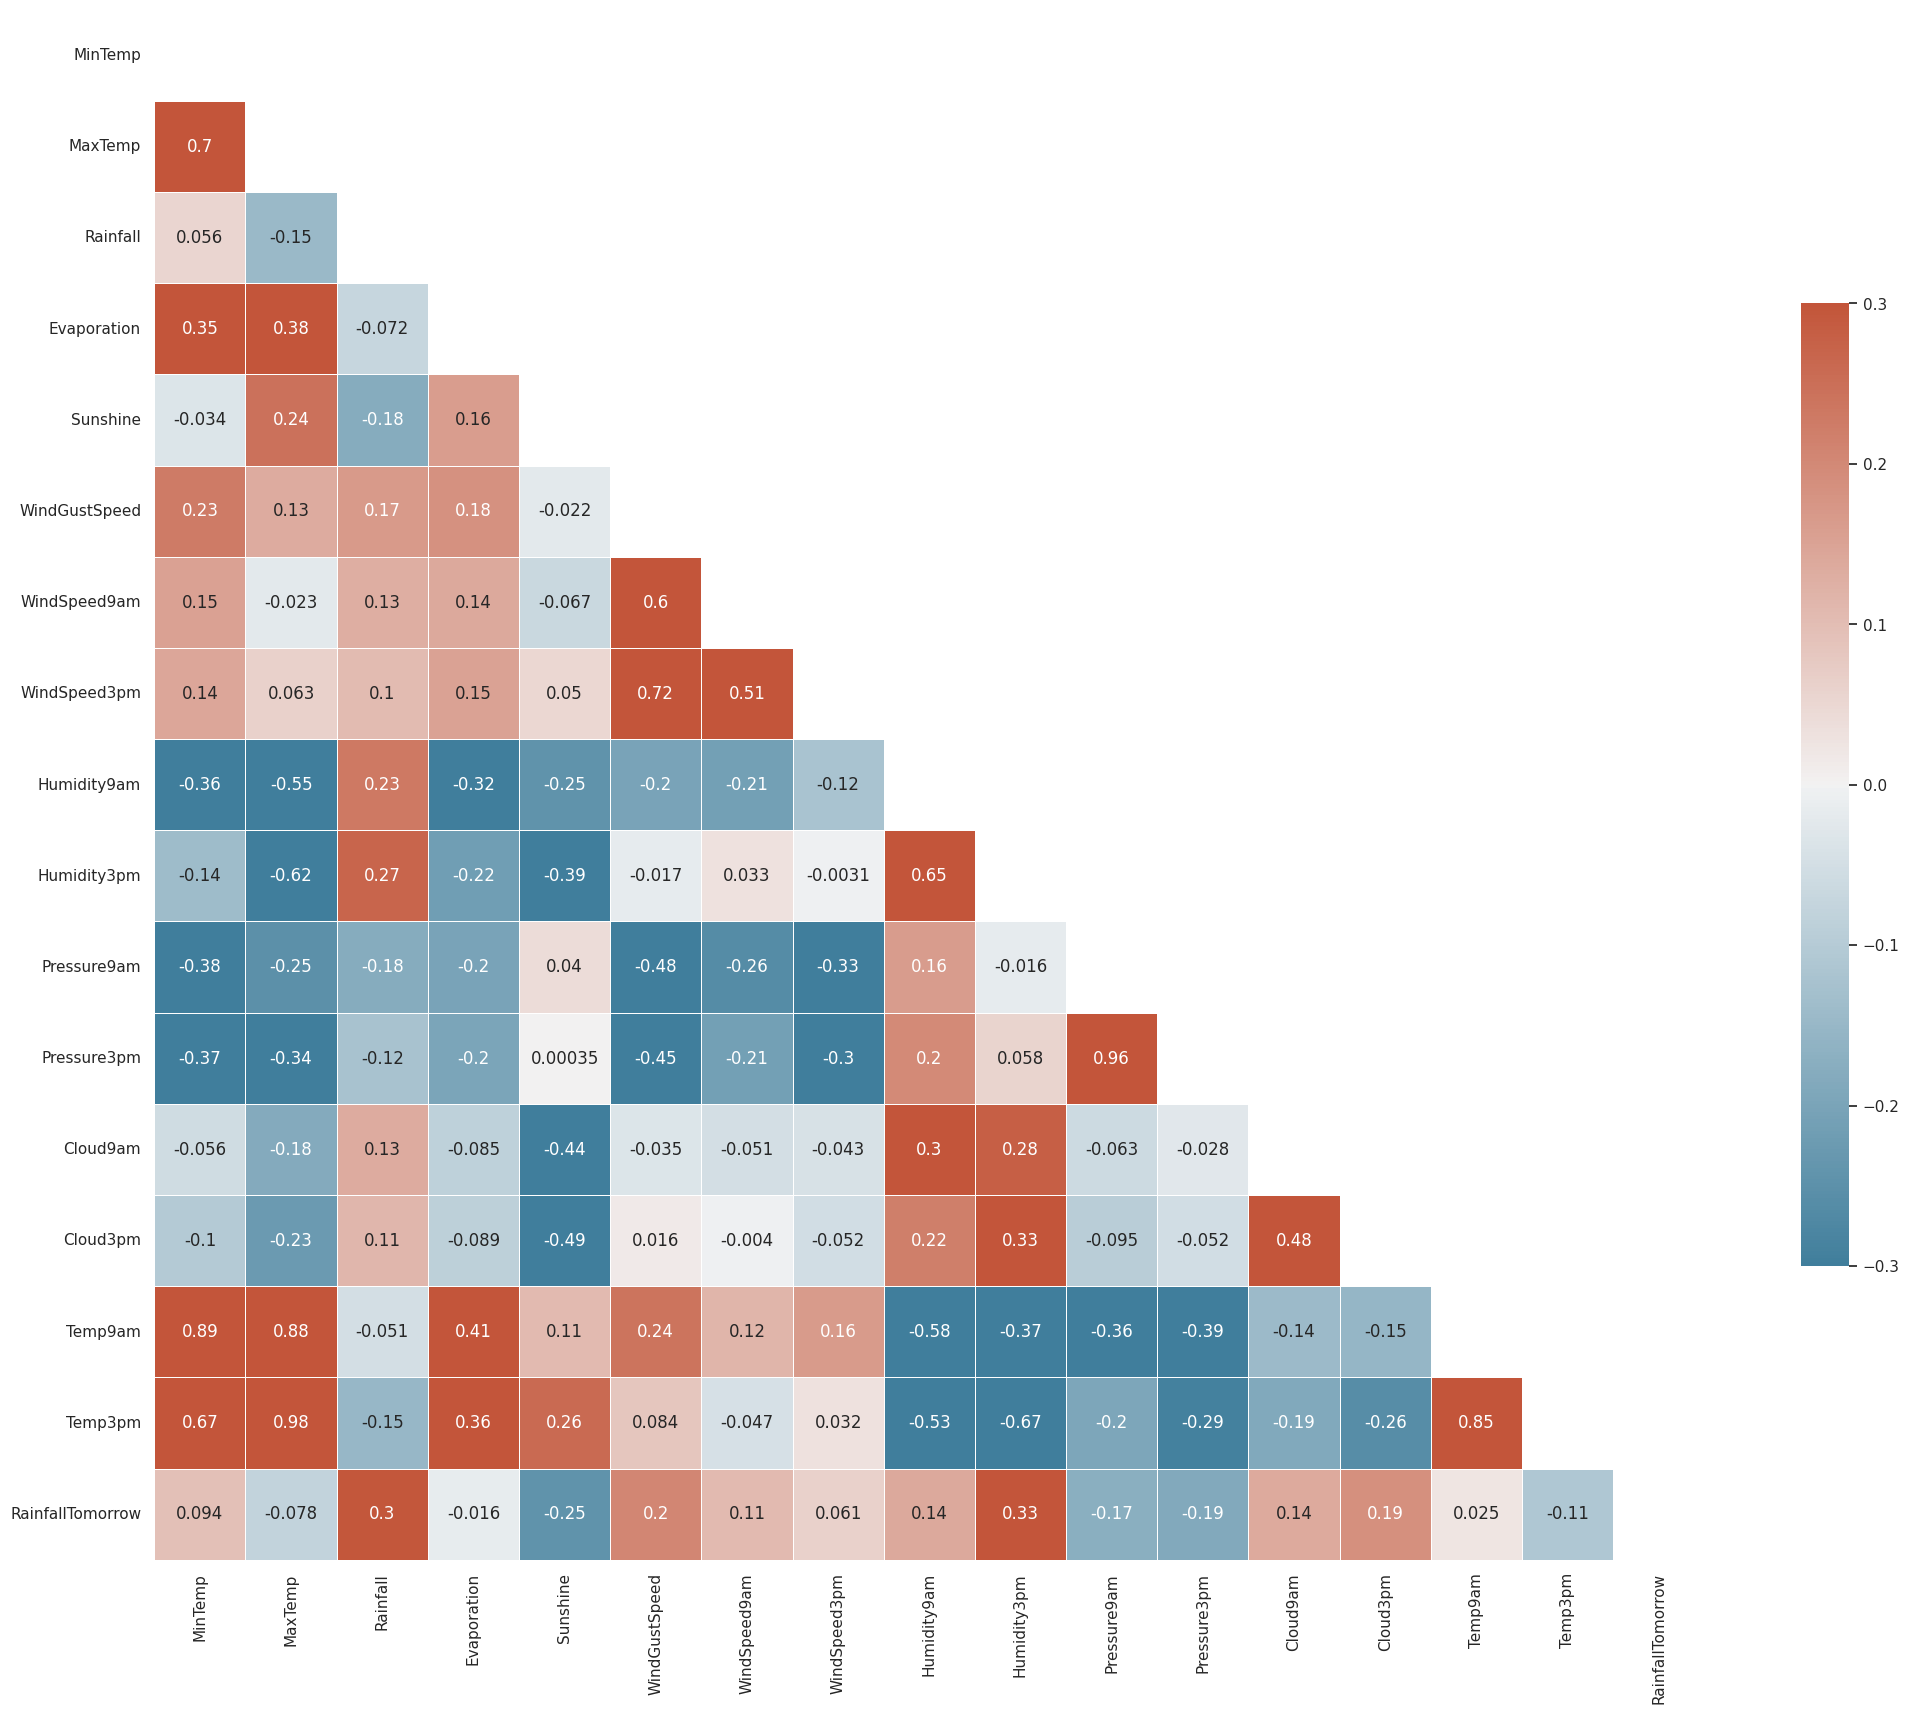

In [ ]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = test_continuas.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.3 ,vmax=.3,center=0, square=True,annot=True ,linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Matriz de correlación categórica

### Matriz de correlación numérica de Train

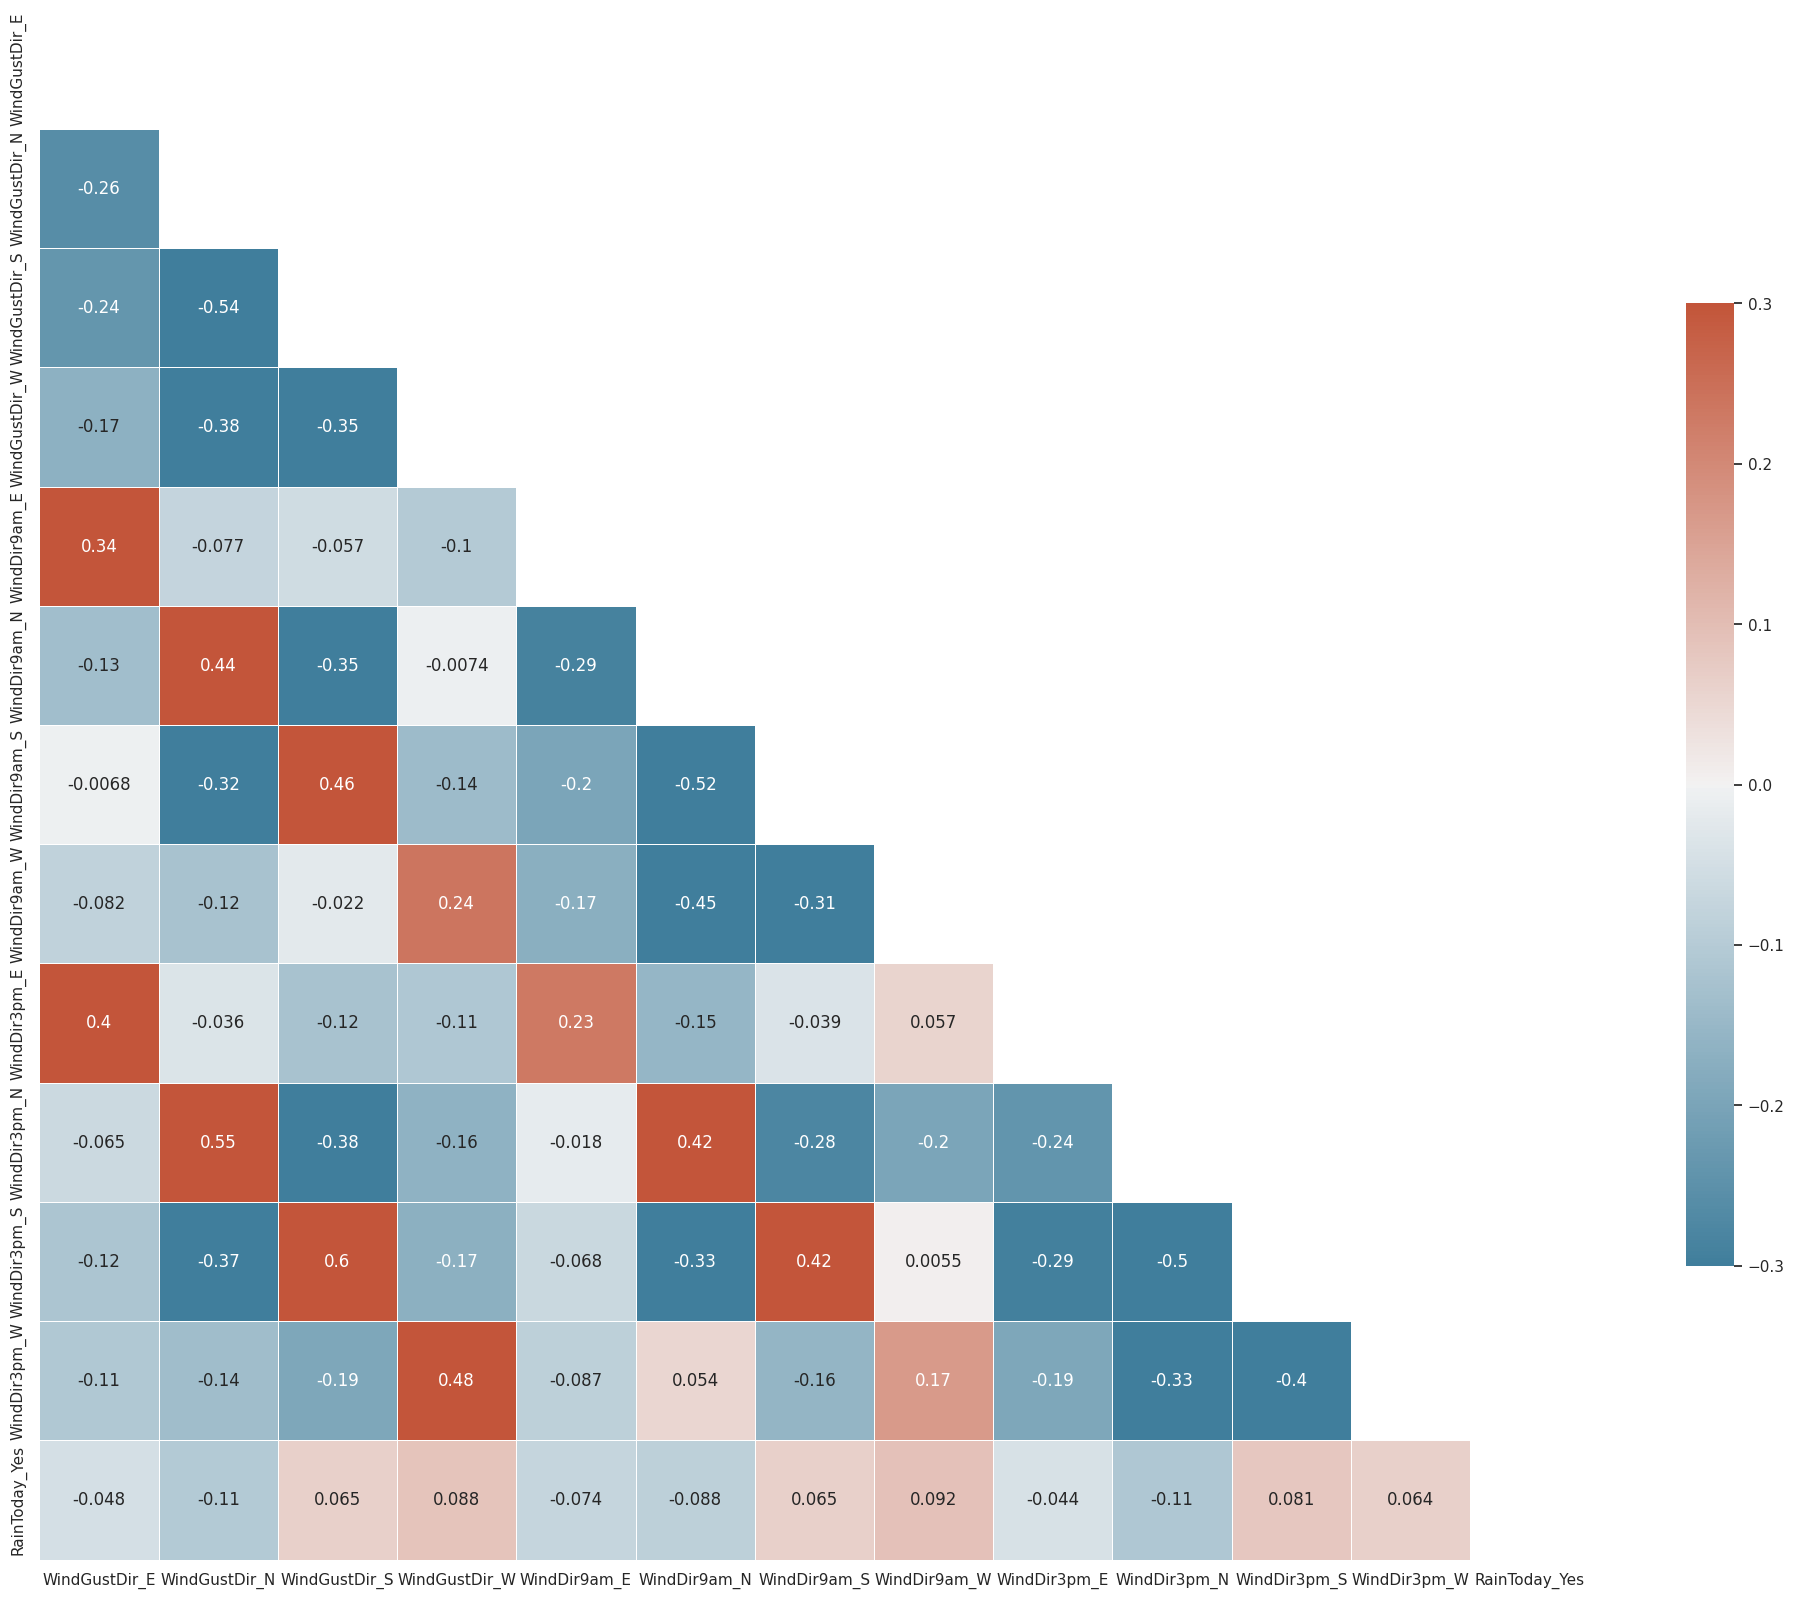

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = train_dummies.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.3 ,vmax=.3,center=0, square=True,annot=True ,linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Matriz de correlación numérica de Test

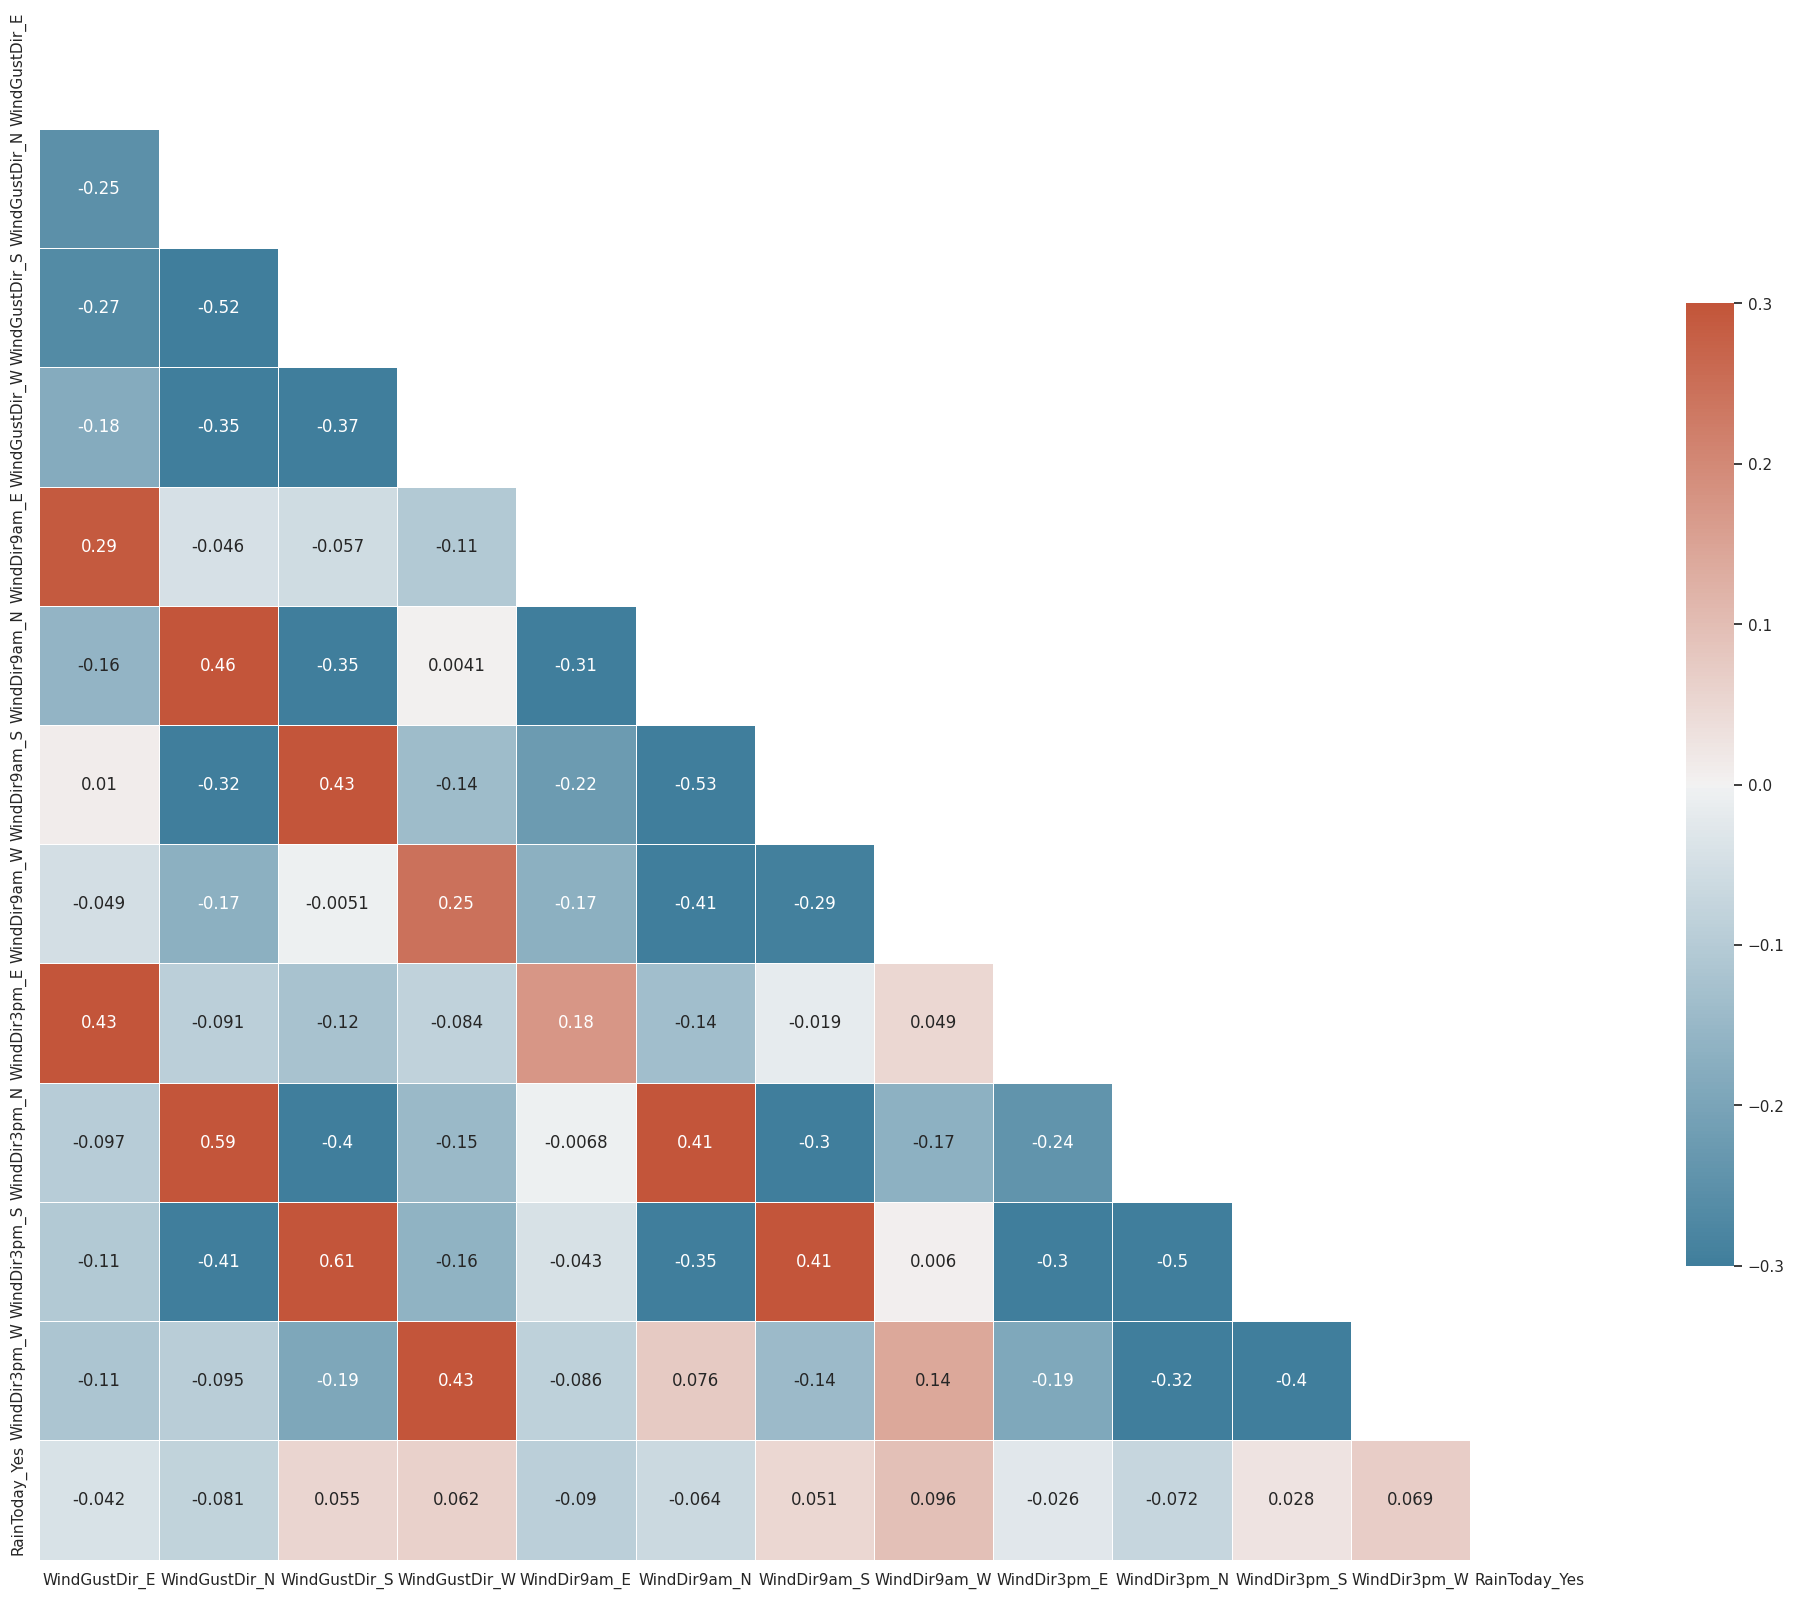

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = test_dummies.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.3 ,vmax=.3,center=0, square=True,annot=True ,linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Validación Cruzada K-Folds

# Union de dataframs
(modificar)

In [ ]:
train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,NaN,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101888,10.7,25.3,0.0,3.2,8.0,NNW,41.0,N,NNW,20.0,...,37.0,1031.8,1027.6,3.0,NaN,13.1,24.7,No,No,0.0
101889,10.7,29.5,0.0,7.2,8.4,NNW,57.0,NNW,NNW,26.0,...,18.0,1023.6,1019.4,2.0,6.0,22.0,28.2,No,No,0.0
101890,7.8,25.2,0.0,7.2,7.8,W,44.0,NW,WNW,9.0,...,44.0,1021.9,1020.6,NaN,NaN,13.4,24.6,No,No,0.0
101891,8.7,32.4,0.0,4.0,11.4,NW,76.0,N,NNW,17.0,...,15.0,1017.3,1013.8,6.0,1.0,18.4,32.0,No,No,0.0


In [ ]:
train_estandarizado

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
0,1.215933,2.079155,-0.314848,2.137163,1.521298,0.430991,-0.975070,-0.021531,-2.627700,-1.898636,-1.657851,-1.662427,-1.250081,-0.055960,2.031383,2.077791,-0.314692
1,1.304671,1.115813,-0.314848,2.948921,1.720741,-0.366508,0.387503,-0.133136,-2.089139,-2.152436,-0.752604,-0.585202,-1.663547,-1.851608,0.906131,1.075637,-0.314692
2,0.789993,1.910952,-0.314848,2.311111,1.806216,-0.874008,-0.241377,-1.472398,0.065104,-2.203196,0.015485,-0.655152,0.403784,-1.851608,-0.094094,1.968180,-0.314692
3,1.482146,2.446142,-0.314848,1.789267,1.036936,0.285991,1.540449,-0.579556,-1.442866,-1.441796,-0.834899,-0.990910,-1.663547,0.392952,2.406468,2.312670,-0.314692
4,1.925833,2.568471,-0.314848,1.963215,1.492806,-0.801508,-0.975070,-1.584003,-1.712147,-1.441796,-0.780036,-1.004900,-1.663547,-0.055960,2.477912,2.422281,-0.314692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22585,-0.061887,0.565332,-0.314848,-0.414076,0.296148,-0.076508,0.492316,0.648100,0.926802,-0.680397,1.839696,1.583238,-0.836615,0.392952,-0.379873,0.715488,-0.314692
22586,-0.061887,1.207560,-0.314848,0.745578,0.410115,1.083491,1.121196,1.206126,-1.766003,-1.644836,0.714995,0.436063,-1.250081,0.392952,1.209770,1.263541,-0.314692
22587,-0.576564,0.550041,-0.314848,0.745578,0.239164,0.140991,-0.660630,0.201680,0.872945,-0.325077,0.481825,0.603942,0.403784,0.392952,-0.326289,0.699830,-0.314692
22588,-0.416837,1.651003,-0.314848,-0.182145,1.264871,2.460989,0.177876,2.098968,-0.958162,-1.797116,-0.149105,-0.347373,0.403784,-1.851608,0.566769,1.858569,-0.314692


In [ ]:
train_dummies

,WindGustDir_E,WindGustDir_N,WindGustDir_S,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_Yes
6047,0,0,1,0,1,0,0,0,0,0,1,0,0
6048,0,0,1,0,0,0,1,0,0,0,1,0,0
6049,0,0,1,0,0,1,0,0,0,1,0,0,0
6050,0,1,0,0,0,1,0,0,0,1,0,0,0
6051,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101888,0,1,0,0,0,1,0,0,0,1,0,0,0
101889,0,1,0,0,0,1,0,0,0,1,0,0,0
101890,0,0,0,1,0,1,0,0,0,0,0,1,0
101891,0,1,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
train_estandarizado = train_estandarizado.reset_index(drop=True)
train_dummies = train_dummies.reset_index(drop=True)
test_estandarizado = test_estandarizado.reset_index(drop=True)
test_dummies = test_dummies.reset_index(drop=True)

In [ ]:
# Juntamos continuas y categóricas
train_processed = pd.concat([train_estandarizado, train_dummies], axis=1)

test_processed = pd.concat([test_estandarizado, test_dummies], axis=1)

In [ ]:
train_processed

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_Yes
0,1.215933,2.079155,-0.314848,2.137163,1.521298,0.430991,-0.975070,-0.021531,-2.627700,-1.898636,...,0,1,0,0,0,0,0,1,0,0
1,1.304671,1.115813,-0.314848,2.948921,1.720741,-0.366508,0.387503,-0.133136,-2.089139,-2.152436,...,0,0,0,1,0,0,0,1,0,0
2,0.789993,1.910952,-0.314848,2.311111,1.806216,-0.874008,-0.241377,-1.472398,0.065104,-2.203196,...,0,0,1,0,0,0,1,0,0,0
3,1.482146,2.446142,-0.314848,1.789267,1.036936,0.285991,1.540449,-0.579556,-1.442866,-1.441796,...,0,0,1,0,0,0,1,0,0,0
4,1.925833,2.568471,-0.314848,1.963215,1.492806,-0.801508,-0.975070,-1.584003,-1.712147,-1.441796,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22585,-0.061887,0.565332,-0.314848,-0.414076,0.296148,-0.076508,0.492316,0.648100,0.926802,-0.680397,...,0,0,1,0,0,0,1,0,0,0
22586,-0.061887,1.207560,-0.314848,0.745578,0.410115,1.083491,1.121196,1.206126,-1.766003,-1.644836,...,0,0,1,0,0,0,1,0,0,0
22587,-0.576564,0.550041,-0.314848,0.745578,0.239164,0.140991,-0.660630,0.201680,0.872945,-0.325077,...,1,0,1,0,0,0,0,0,1,0
22588,-0.416837,1.651003,-0.314848,-0.182145,1.264871,2.460989,0.177876,2.098968,-0.958162,-1.797116,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
test_processed

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_Yes
0,1.114136,1.613681,-0.315742,0.848806,0.118663,-0.417499,0.079349,-0.489346,-1.678192,-1.751012,...,0,0,0,1,0,0,0,1,0,0
1,0.618108,1.307132,-0.315742,0.599204,0.118663,0.169860,1.560624,-0.032169,-1.172583,-1.440642,...,0,1,0,0,0,1,0,0,0,0
2,1.007845,1.409315,-0.315742,1.597613,0.118663,0.390120,0.307237,-1.403700,-1.453477,-1.647555,...,0,0,1,0,0,1,0,0,0,0
3,0.954699,1.365522,0.078988,1.160809,0.118663,-0.270659,0.307237,-1.175112,-1.790549,-1.595827,...,0,1,0,0,0,0,0,1,0,1
4,0.919268,0.796217,-0.072831,0.224800,0.118663,0.977479,0.307237,-0.946523,-0.161367,-0.457807,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,-1.047131,-0.984687,-0.315742,-0.087203,0.118663,0.023020,1.104847,0.310713,1.130743,0.990583,...,0,0,1,0,0,0,1,0,0,0
5638,-0.604248,-1.437211,-0.012104,-0.087203,0.118663,-1.518797,-1.629814,-0.946523,1.636351,1.611322,...,0,0,1,0,0,0,0,1,0,1
5639,-0.905409,-1.072272,-0.315742,-0.087203,0.118663,-0.711179,-0.148539,-0.489346,1.299279,0.835399,...,0,0,1,0,0,0,1,0,0,0
5640,-1.188853,-0.999284,-0.315742,-0.087203,0.118663,-0.270659,1.104847,0.539302,1.186922,0.990583,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
train_processed.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow', 'WindGustDir_E',
       'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_E',
       'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_E',
       'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainToday_Yes'],
      dtype='object')

# División del conjunto de datos de entrenamiento


In [ ]:
# Elimina las características especificadas de train_processed y asigna el resultado a y_train
# Las características eliminadas son aquellas que no se utilizarán como predictores en el modelo
y_train_rl = train_processed.drop(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainToday_Yes'], axis=1)

# Elimina la etiqueta 'RainfallTomorrow' de train_processed y asigna el resultado a x_train
# x_train contendrá las características que se utilizarán para entrenar el modelo
x_train_rl = train_processed.drop(['RainfallTomorrow'], axis=1)

# División del conjunto de datos de prueba
# Elimina las mismas características que en el conjunto de entrenamiento y asigna el resultado a y_test
y_test_rl = test_processed.drop(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainToday_Yes'], axis=1)

# Elimina la etiqueta 'RainfallTomorrow' de test_processed y asigna el resultado a x_test
# x_test contendrá las características que se utilizarán para probar el modelo
# Elimina las columnas especificadas de train_processed y asigna el resultado a x_train_rl
x_test_rl = test_processed.drop(['RainfallTomorrow'], axis=1)



In [ ]:
y_train_rl

,RainfallTomorrow
0,-0.314692
1,-0.314692
2,-0.314692
3,-0.314692
4,-0.314692
...,...
22585,-0.314692
22586,-0.314692
22587,-0.314692
22588,-0.314692


In [ ]:
x_train_rl

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_Yes
0,1.215933,2.079155,-0.314848,2.137163,1.521298,0.430991,-0.975070,-0.021531,-2.627700,-1.898636,...,0,1,0,0,0,0,0,1,0,0
1,1.304671,1.115813,-0.314848,2.948921,1.720741,-0.366508,0.387503,-0.133136,-2.089139,-2.152436,...,0,0,0,1,0,0,0,1,0,0
2,0.789993,1.910952,-0.314848,2.311111,1.806216,-0.874008,-0.241377,-1.472398,0.065104,-2.203196,...,0,0,1,0,0,0,1,0,0,0
3,1.482146,2.446142,-0.314848,1.789267,1.036936,0.285991,1.540449,-0.579556,-1.442866,-1.441796,...,0,0,1,0,0,0,1,0,0,0
4,1.925833,2.568471,-0.314848,1.963215,1.492806,-0.801508,-0.975070,-1.584003,-1.712147,-1.441796,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22585,-0.061887,0.565332,-0.314848,-0.414076,0.296148,-0.076508,0.492316,0.648100,0.926802,-0.680397,...,0,0,1,0,0,0,1,0,0,0
22586,-0.061887,1.207560,-0.314848,0.745578,0.410115,1.083491,1.121196,1.206126,-1.766003,-1.644836,...,0,0,1,0,0,0,1,0,0,0
22587,-0.576564,0.550041,-0.314848,0.745578,0.239164,0.140991,-0.660630,0.201680,0.872945,-0.325077,...,1,0,1,0,0,0,0,0,1,0
22588,-0.416837,1.651003,-0.314848,-0.182145,1.264871,2.460989,0.177876,2.098968,-0.958162,-1.797116,...,0,0,1,0,0,0,1,0,0,0


# Regresión Lineal

In [ ]:
y_train_rl

,RainfallTomorrow
0,-0.314692
1,-0.314692
2,-0.314692
3,-0.314692
4,-0.314692
...,...
22585,-0.314692
22586,-0.314692
22587,-0.314692
22588,-0.314692


In [ ]:
x_train_rl.shape, y_train_rl.shape, x_test_rl.shape, y_test_rl.shape

((22590, 29), (22590, 1), (5642, 29), (5642, 1))

In [ ]:
# Instanciar el imputador
imputer = SimpleImputer(strategy='mean')

# Ajustar y transformar los datos de entrenamiento
x_train_imputed = imputer.fit_transform(x_train_rl)
y_train_imputed = y_train_rl

# Transformar los datos de validación
x_val_imputed = imputer.transform(x_train_rl)

In [ ]:
# Crea una instancia del modelo de regresión lineal
model = LinearRegression()
model.fit(x_train_rl, y_train_rl)

LinearRegression()

In [ ]:
# Impute missing values in x_test_rl
x_test_imputed = imputer.transform(x_test_rl)

# Make predictions using the imputed data
y_pred = model.predict(x_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# MSE: Error Cuadratico Medio
mse = mean_squared_error(y_test_rl, y_pred)

# R^2
r2 = r2_score(y_test_rl, y_pred)

# MAE: Error Absoluto Medio
mae = mean_absolute_error(y_test_rl, y_pred)

# RMSE: Raíz del Error Cuadrático Medio
rmse = np.sqrt(mean_squared_error(y_test_rl, y_pred))

print(f"\nR^2: {r2}\n")
print(f"MSE(Error Cuadratico Medio): {mse}\n")
print(f"MAE(Error Absoluto Medio): {mae}\n")
print(f"RMSE(Raíz del Error Cuadrático Medio): {rmse}\n")

Coefficients: [[-0.0407449   0.07603522  0.14962785  0.01279303 -0.13009594  0.20800795
  -0.01604192 -0.08974218 -0.06016079  0.35349013  0.46445679 -0.53846508
  -0.02748936  0.0291743   0.01264246  0.01904106  0.05077204 -0.01875221
  -0.0099921  -0.02202773  0.0773806  -0.058697    0.01099015 -0.02967375
  -0.00936394 -0.02150686  0.01892901  0.01194179  0.06009669]]
Intercept: [0.0140255]

R^2: 0.25425408690412266

MSE(Error Cuadratico Medio): 0.7457459130958772

MAE(Error Absoluto Medio): 0.4180813647453725

RMSE(Raíz del Error Cuadrático Medio): 0.8635658128341333



# Gradiente descendiente

In [ ]:
# Regresión lineal utilizando SGDRegressor
model_sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model_sgd.fit(x_train_rl, y_train_rl)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(random_state=42)

In [ ]:

# Use an older version of scikit-learn that supports NaN values
model_sgd = SGDRegressor(random_state=42)
model_sgd.fit(x_train_rl, y_train_rl)

# Make predictions
y_pred_sgd = model_sgd.predict(x_test_rl)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Coeficientes
coefficients_sgd = model_sgd.coef_
intercept_sgd = model_sgd.intercept_
print("Coefficients (SGD):", coefficients_sgd)
print("Intercept (SGD):", intercept_sgd)

# MSE: Error Cuadrático Medio
mse_sgd = mean_squared_error(y_test_rl, y_pred_sgd)

# R^2
r2_sgd = r2_score(y_test_rl, y_pred_sgd)

# MAE: Error Absoluto Medio
mae_sgd = mean_absolute_error(y_test_rl, y_pred_sgd)

# RMSE: Raíz del Error Cuadrático Medio
rmse_sgd = np.sqrt(mse_sgd)

print(f"\nR^2 (SGD): {r2_sgd}\n")
print(f"MSE (SGD): {mse_sgd}\n")
print(f"MAE (SGD): {mae_sgd}\n")
print(f"RMSE (SGD): {rmse_sgd}\n")

Coefficients (SGD): [-0.02973505  0.07404006  0.13594336  0.01819625 -0.13203472  0.22992155
 -0.03407306 -0.09601606 -0.03921516  0.37093614  0.42155974 -0.52850966
 -0.01309288  0.03687241  0.01038566  0.04196091  0.05808778 -0.01279866
 -0.00732904 -0.01823527  0.08365019 -0.04720534  0.00573739 -0.02245743
  0.0019106  -0.00993961  0.01370512  0.0140487   0.07183232]
Intercept (SGD): [0.01985745]

R^2 (SGD): 0.2506759241851285

MSE (SGD): 0.7493240758148714

MAE (SGD): 0.4384661203874213

RMSE (SGD): 0.8656350708092131



# Lasso

In [ ]:
lasso = Lasso(alpha=0.1)

lasso.fit(x_train_rl, y_train_rl)

Lasso(alpha=0.1)

In [ ]:
print("\nCoeficientes del modelo Lasso:")
print(lasso.coef_)
print("Lasso Score df_train:", lasso.score(x_train_rl, y_train_rl))
print("Lasso Score df_test:", lasso.score(x_test_rl, y_test_rl))


Coeficientes del modelo Lasso:
[ 0.          0.          0.08278177  0.         -0.07165773  0.04170011
  0.          0.          0.          0.16918611 -0.         -0.05764961
  0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.        ]
Lasso Score df_train: 0.15547992197797988
Lasso Score df_test: 0.1670003273335814


# Ridge

In [ ]:
ridge = Ridge(alpha=0.1)

ridge.fit(x_train_rl, y_train_rl)

Ridge(alpha=0.1)

In [ ]:
print("\nCoeficientes del modelo Ridge:")
print(ridge.coef_)
print("Ridge Score df_train:", ridge.score(x_train_rl, y_train_rl))
print("Ridge Score df_test:", ridge.score(x_test_rl, y_test_rl))


Coeficientes del modelo Ridge:
[[-0.04074628  0.07602451  0.14962719  0.01279026 -0.13009765  0.20800447
  -0.01604395 -0.0897405  -0.06016036  0.35348603  0.464363   -0.53837357
  -0.02748955  0.02917356  0.01263814  0.01906043  0.05077093 -0.0187479
  -0.00999384 -0.02202919  0.07738048 -0.05869419  0.01098895 -0.02967524
  -0.00935706 -0.02149673  0.01892017  0.01193362  0.06008677]]
Ridge Score df_train: 0.21662048214813912
Ridge Score df_test: 0.25425270767028363


# elastcnet

In [ ]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(x_train_rl, y_train_rl)

ElasticNet(alpha=0.1)

In [ ]:
print("\nCoeficientes del modelo ElasticNet:")
print(elasticnet.coef_)
print("Elasticnet Score df_train:", elasticnet.score(x_train_rl, y_train_rl))
print("Elasticnet Score df_test:", elasticnet.score(x_test_rl, y_test_rl))


Coeficientes del modelo ElasticNet:
[ 0.          0.          0.1093591   0.         -0.09956843  0.06927672
  0.         -0.          0.          0.19300426 -0.         -0.08674792
  0.          0.00108018  0.00941938  0.          0.          0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.         -0.          0.        ]
Elasticnet Score df_train: 0.17766389230055002
Elasticnet Score df_test: 0.19370038355860764


# solución del problema de clasificación con regresión logística.


In [ ]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Elimina las características especificadas de train_processed y asigna el resultado a y_train
# Las características eliminadas son aquellas que no se utilizarán como predictores en el modelo
y_train_rlog = train_categoricas.drop(['WindGustDir',	'WindDir9am',	'WindDir3pm',	'RainToday'], axis=1)

# Elimina la etiqueta 'RainfallTomorrow' de train_processed y asigna el resultado a x_train
# x_train contendrá las características que se utilizarán para entrenar el modelo
x_train_rlog = train_processed.drop(['RainfallTomorrow'], axis=1)

# División del conjunto de datos de prueba
# Elimina las mismas características que en el conjunto de entrenamiento y asigna el resultado a y_test
y_test_rlog = test_categoricas.drop(['WindGustDir',	'WindDir9am',	'WindDir3pm',	'RainToday'], axis=1)

# Elimina la etiqueta 'RainfallTomorrow' de test_processed y asigna el resultado a x_test
# x_test contendrá las características que se utilizarán para probar el modelo
# Elimina las columnas especificadas de train_processed y asigna el resultado a x_train_rl
x_test_rlog = test_processed.drop(['RainfallTomorrow'], axis=1)


In [ ]:
print("Número de muestras en x_train_rlog:", len(x_train_rlog))
print("Número de muestras en y_train_rlog_flat:", len(y_train_rlog))


Número de muestras en x_train_rlog: 22590
Número de muestras en y_train_rlog_flat: 22590


In [ ]:
# Se define el modelo de Regresión Logística
logreg = LogisticRegression()
logreg_2D = LogisticRegression()

In [ ]:
# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(x_train_rlog, y_train_rlog)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test_rlog)
model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_test_rlog

,RainTomorrow
8428,No
8429,No
8430,Yes
8431,Yes
8432,Yes
...,...
102515,Yes
102516,No
102517,No
102518,Yes


In [ ]:
x_test_rlog

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_Yes
0,1.114136,1.613681,-0.315742,0.848806,0.118663,-0.417499,0.079349,-0.489346,-1.678192,-1.751012,...,0,0,0,1,0,0,0,1,0,0
1,0.618108,1.307132,-0.315742,0.599204,0.118663,0.169860,1.560624,-0.032169,-1.172583,-1.440642,...,0,1,0,0,0,1,0,0,0,0
2,1.007845,1.409315,-0.315742,1.597613,0.118663,0.390120,0.307237,-1.403700,-1.453477,-1.647555,...,0,0,1,0,0,1,0,0,0,0
3,0.954699,1.365522,0.078988,1.160809,0.118663,-0.270659,0.307237,-1.175112,-1.790549,-1.595827,...,0,1,0,0,0,0,0,1,0,1
4,0.919268,0.796217,-0.072831,0.224800,0.118663,0.977479,0.307237,-0.946523,-0.161367,-0.457807,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,-1.047131,-0.984687,-0.315742,-0.087203,0.118663,0.023020,1.104847,0.310713,1.130743,0.990583,...,0,0,1,0,0,0,1,0,0,0
5638,-0.604248,-1.437211,-0.012104,-0.087203,0.118663,-1.518797,-1.629814,-0.946523,1.636351,1.611322,...,0,0,1,0,0,0,0,1,0,1
5639,-0.905409,-1.072272,-0.315742,-0.087203,0.118663,-0.711179,-0.148539,-0.489346,1.299279,0.835399,...,0,0,1,0,0,0,1,0,0,0
5640,-1.188853,-0.999284,-0.315742,-0.087203,0.118663,-0.270659,1.104847,0.539302,1.186922,0.990583,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y_pred


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

el siguiente codigo nos da un reporte, calcula la matriz de confucion y nos da el reporte de las metricas
ademas nos genera una confiaza ya que podemos evaluar bien

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calcular métricas
accuracy_logreg = accuracy_score(y_test_rlog, y_pred) # compara el valor real y el predicho

confusion_matrix_logreg = confusion_matrix(y_test_rlog, y_pred)

classification_report_logreg = classification_report(y_test_rlog, y_pred)

# Imprimir métricas
print("Métricas para logreg:")
print(f'Precisión: {accuracy_logreg}')
print("Matriz de confusión:")
print(confusion_matrix_logreg)
print("Reporte de clasificación:")
print(classification_report_logreg)


Métricas para logreg:
Precisión: 0.847926267281106
Matriz de confusión:
[[4138  225]
 [ 633  646]]
Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91      4363
         Yes       0.74      0.51      0.60      1279

    accuracy                           0.85      5642
   macro avg       0.80      0.73      0.75      5642
weighted avg       0.84      0.85      0.84      5642



Soporte: es la cantidad de registros asociadas a cada una de las categorias. En este caso tenimoas 1871 registros en nuestro set de testeo, que 1451 pertenecen a la clase 0 y 420 ppertenecen a la case 1. (idea de si df esta desbalanceado o no)

Precision: es el total de las correctas sobre el total de las predicciones realizada para cada una de las categorias. (siempre tendemos a  verla)

Recall: Proporcion de solamente las instancias positivas que predijo el modelo respecto a las positivas reales.

F1_socre: composicion entre la precision y recall, entonces f1_score es ver cuan balanceado esta si se quiere la participacion de las positivas sobre las correectas totales del modelo y asi tener una idea de como se esta portando el modelo de clasificacion.

La precisión del 100% y la matriz de confusión que muestra ceros en los falsos positivos y falsos negativos sugieren que el modelo está prediciendo perfectamente los datos de prueba.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos de entrenamiento en subconjuntos de entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(x_train_rlog, y_train_rlog, test_size=0.2, random_state=42)

# Inicializar y entrenar un nuevo modelo de regresión logística en el subconjunto de entrenamiento
model_split = LogisticRegression(random_state=42)
model_split.fit(X_train_split, y_train_split)

# Realizar predicciones en el subconjunto de validación
y_pred_val = model_split.predict(X_val_split)

# Calcular la precisión en el subconjunto de validación
accuracy_val = accuracy_score(y_val_split, y_pred_val)
print("Precisión en el subconjunto de validación:", accuracy_val)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión en el subconjunto de validación: 0.8410801239486498


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_test = model_split.predict(x_test_rlog)

# Calcular la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test_rlog, y_pred_test)
print("Precisión en el conjunto de prueba:", accuracy_test)


Precisión en el conjunto de prueba: 0.8475717830556541


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


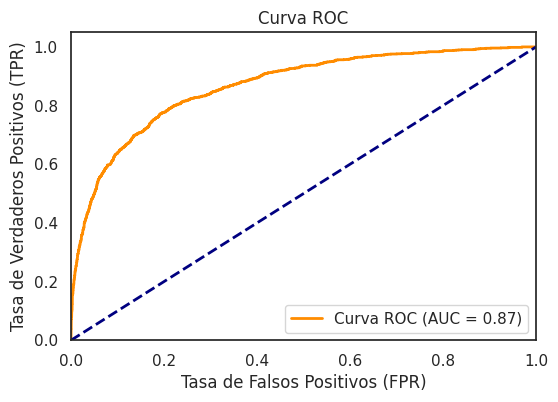

In [ ]:
# Replace 'No' with 0 and 'Yes' with 1
y_test_binary = y_test_rlog.replace({'No': 0, 'Yes': 1})

# Use sklearn.preprocessing.LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test_binary)
# Obtengo las probabilidades de predicción del modelo
y_probs = model.predict_proba(x_test_rlog)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)

roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.8662768891221707

In [ ]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.96928719, 0.96928719,
        1.        ]),
 array([0.00000000e+00, 7.81860829e-04, 1.17279124e-02, ...,
        9.98436278e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99901878, 0.99901878, 0.98074241, ..., 0.01121582, 0.01115873,
        0.00398448]))

In [ ]:
y_probs>0

array([ True,  True,  True, ...,  True,  True,  True])

Calcular el área bajo la curva (AUC): Utiliza la función roc_auc_score del módulo metrics para calcular el área bajo la curva ROC. Cuanto mayor sea el AUC, mejor será el rendimiento del modelo.

Identificar el mejor umbral: No hay un umbral universalmente óptimo. Depende del equilibrio entre la sensibilidad (TPR) y la especificidad (TNR = 1 - FPR) que desees. Puedes considerar maximizar la métrica F1-score, que proporciona un equilibrio entre la precisión y el recall, o utilizar un punto en la curva ROC que esté más cerca de la esquina superior izquierda, lo que indica un mejor equilibrio entre TPR y FPR.

Calcular métricas específicas para el umbral seleccionado: Después de seleccionar un umbral, puedes calcular métricas como precisión, recall, F1-score, etc., en función de ese umbral específico.

# Modelos bases.

## Regresión Lineal

In [ ]:
# Dejamos unicamente como valores los de Rainfall

# Train
y_train_rl_base = train_processed.drop(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainToday_Yes'], axis=1)
x_train_rl_base = train_processed.drop(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainToday_Yes', 'RainfallTomorrow'], axis=1)

# Test
y_test_rl_base = test_processed.drop(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainToday_Yes'], axis=1)
x_test_rl_base = test_processed.drop(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainToday_Yes', 'RainfallTomorrow'], axis=1)



In [ ]:
# Instanciar el imputador
imputer = SimpleImputer(strategy='mean')

# Ajustar y transformar los datos de entrenamiento
x_train_imputed_base = imputer.fit_transform(x_train_rl_base)
y_train_imputed_base = y_train_rl_base

# Transformar los datos de validación
x_val_imputed_base = imputer.transform(x_train_rl_base)

In [ ]:
# Crea una instancia del modelo de regresión lineal
model = LinearRegression()
model.fit(x_train_rl_base, y_train_rl_base)

LinearRegression()

In [ ]:
# Impute missing values in x_test_rl
x_test_imputed_base = imputer.transform(x_test_rl_base)

# Make predictions using the imputed data
y_pred_base = model.predict(x_test_imputed_base)

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# MSE: Error Cuadratico Medio
mse_base = mean_squared_error(y_test_rl_base, y_pred_base)

# R^2
r2_base = r2_score(y_test_rl_base, y_pred_base)

# MAE: Error Absoluto Medio
mae_base = mean_absolute_error(y_test_rl_base, y_pred_base)

# RMSE: Raíz del Error Cuadrático Medio
rmse_base = np.sqrt(mean_squared_error(y_test_rl_base, y_pred_base))

print(f"\nR^2: {r2_base}\n")
print(f"MSE(Error Cuadratico Medio): {mse_base}\n")
print(f"MAE(Error Absoluto Medio): {mae_base}\n")
print(f"RMSE(Raíz del Error Cuadrático Medio): {rmse_base}\n")

Coefficients: [[0.25295542]]
Intercept: [-2.35792411e-17]

R^2: 0.08545330308151788

MSE(Error Cuadratico Medio): 0.914546696918482

MAE(Error Absoluto Medio): 0.44766510705161705

RMSE(Raíz del Error Cuadrático Medio): 0.9563193488152805



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Clasificación

In [ ]:
# Dejamos unicamente como valores los de RainToday_Yes

# Train
y_train_rlog_base  = train_categoricas.drop(['WindGustDir',	'WindDir9am',	'WindDir3pm',	'RainToday'], axis=1)
x_train_rlog_base  = train_processed.drop(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainfallTomorrow'], axis=1)

# Test
y_test_rlog_base  = test_categoricas.drop(['WindGustDir',	'WindDir9am',	'WindDir3pm',	'RainToday'], axis=1)
x_test_rlog_base  = test_processed.drop(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_N', 'WindGustDir_S', 'WindGustDir_W', 'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'RainfallTomorrow'], axis=1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import column_or_1d

# Asegurarse de que y_train_rlog_base sea un array 1D
y_train_rlog_base = column_or_1d(y_train_rlog_base)

# Inicializar y entrenar un modelo de regresión logística
model_base = LogisticRegression()
model_base.fit(x_train_rlog_base, y_train_rlog_base)

# Verificar los nombres de las características para el conjunto de prueba
missing_features = set(model_base.feature_names_in_) - set(x_test_rlog_base.columns)
new_features = set(x_test_rlog_base.columns) - set(model_base.feature_names_in_)

if missing_features:
    print(f"Faltan características en el conjunto de prueba: {missing_features}")
    for feature in missing_features:
        x_test_rlog_base[feature] = 0  # O el valor que sea apropiado

if new_features:
    print(f"Existen nuevas características en el conjunto de prueba: {new_features}")
    x_test_rlog_base = x_test_rlog_base.drop(columns=new_features)

# Realizar predicciones en el conjunto de prueba
y_pred_base = model_base.predict(x_test_rlog_base)


In [ ]:
# Calcular métricas
accuracy_logreg_base = accuracy_score(y_test_rlog_base, y_pred_base) # compara el valor real y el predicho

confusion_matrix_logreg_base = confusion_matrix(y_test_rlog_base, y_pred_base)

classification_report_logreg_base = classification_report(y_test_rlog_base, y_pred_base)

# Imprimir métricas
print("Métricas para logreg:")
print(f'Precisión: {accuracy_logreg_base}')
print("Matriz de confusión:")
print(confusion_matrix_logreg_base)
print("Reporte de clasificación:")
print(classification_report_logreg_base)


Métricas para logreg:
Precisión: 0.7733073378234668
Matriz de confusión:
[[4363    0]
 [1279    0]]
Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.77      1.00      0.87      4363
         Yes       0.00      0.00      0.00      1279

    accuracy                           0.77      5642
   macro avg       0.39      0.50      0.44      5642
weighted avg       0.60      0.77      0.67      5642



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Optimización de la selección de hiperparámetros.

##  k-folds

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits

## importamos un bosque
from sklearn.ensemble import RandomForestClassifier

## cross_val_score se encarga de ejecutar la validación cruzada, el resto son técnicas para hacerlo
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, LeaveOneOut

In [ ]:
### se levanta dataset de flores y se define un bosque aleatorio
data = load_iris()
X, y = data.data, data.target

clf = RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
### n_splits es la cantidad de folds
cv_strategies = [
    ("KFold", KFold(n_splits=5, shuffle=True, random_state=42)),
    ("StratifiedKFold", StratifiedKFold(n_splits=5, shuffle=True, random_state=42)),
    ("Leave-One-Out", LeaveOneOut()),
]

results = {}
for name, cv in cv_strategies:
    scores = cross_val_score(clf, X, y, cv=cv)
    results[name] = scores

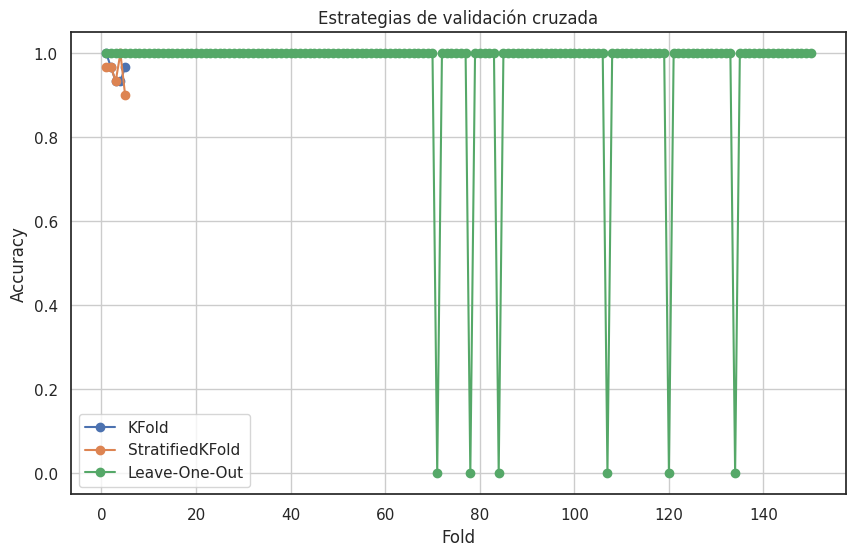

In [ ]:
plt.figure(figsize=(10, 6))
for name, scores in results.items():
    plt.plot(range(1, len(scores) + 1), scores, marker='o', label=name)

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Estrategias de validación cruzada")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
results['KFold']

array([1.        , 0.96666667, 0.93333333, 0.93333333, 0.96666667])

In [ ]:
for strategy in cv_strategies:
  print('Media para la estrategia', strategy[0],':',results['KFold'].mean())
  print('Desvío estándar para la estrategia', strategy[0],':',results['KFold'].std())

Media para la estrategia KFold : 0.9600000000000002
Desvío estándar para la estrategia KFold : 0.024944382578492935
Media para la estrategia StratifiedKFold : 0.9600000000000002
Desvío estándar para la estrategia StratifiedKFold : 0.024944382578492935
Media para la estrategia Leave-One-Out : 0.9600000000000002
Desvío estándar para la estrategia Leave-One-Out : 0.024944382578492935


Utilizar grid search, random search u optuna. Justificar su uso. Justificar los hiperparámetros que se están optimizando.

# Explicabilidad del modelo

# **Explicabilidad SHAP**

In [ ]:

# Definir los preprocesadores para datos numéricos y categóricos
numeric_features = x_train_rlog_base.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train_rlog_base.select_dtypes(include=['object', 'bool']).columns


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.validation import column_or_1d
# Crear los transformers para las columnas numéricas y categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # 'drop=first' para evitar la multicolinealidad


In [ ]:
from sklearn.preprocessing import StandardScaler

# Combinar los transformers en una columna preprocesadora
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Crear el pipeline que primero transformará los datos y luego ajustará el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])


In [ ]:

# Ajustar el modelo
pipeline.fit(x_train_rlog_base, y_train_rlog_base)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['RainToday_Yes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:

# Realizar predicciones
y_pred_rlog = pipeline.predict(x_test_rlog_base)
y_pred_rlog



array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:

# Escalar los datos de entrenamiento y prueba
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_rlog_base)
x_test_scaled = scaler.transform(x_test_rlog_base)
x_test_scaled_shap= scaler.fit_transform(test_processed)
x_train_scaled_shap= scaler.fit_transform(train_processed)


In [ ]:
!pip install shap;
import shap

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Convertir las etiquetas categóricas a numéricas
y_train_encoded = label_encoder.fit_transform(y_train_rlog)
y_test_encoded = label_encoder.transform(y_test_rlog)
y_test_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
model = RidgeCV(alphas=np.logspace(-10, 10, 200))
model.fit(x_train_scaled_shap, y_train_encoded.reshape(len(y_train_encoded),))

RidgeCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348e-09, 6.44236351e-09, 8.11984499e-09,
       1.02341140e-08, 1.28989026e-0...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]))

In [ ]:
model.alpha_

57.38441648302404

In [ ]:
y_pred = model.predict(x_test_scaled_shap)
y_ajuste_train = model.predict(x_train_scaled_shap)

print('Métricas en el entrenamiento')
print(mean_squared_error(y_train_encoded, y_ajuste_train))
print(r2_score(y_train_encoded, y_ajuste_train))

print('Métricas en el conjunto de prueba')
print(mean_squared_error(y_test_encoded, y_pred))
print(r2_score(y_test_encoded, y_pred))

Métricas en el entrenamiento
0.09811232696719206
0.44572916434696186
Métricas en el conjunto de prueba
0.09631106569692488
0.4506026065947465


In [ ]:
feature_names = [col for col in test_processed.columns if col != 'RainToday_Yes']
feature_names


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainfallTomorrow',
 'WindGustDir_E',
 'WindGustDir_N',
 'WindGustDir_S',
 'WindGustDir_W',
 'WindDir9am_E',
 'WindDir9am_N',
 'WindDir9am_S',
 'WindDir9am_W',
 'WindDir3pm_E',
 'WindDir3pm_N',
 'WindDir3pm_S',
 'WindDir3pm_W']

In [ ]:
x_test_rlog

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_W,WindDir9am_E,WindDir9am_N,WindDir9am_S,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,RainToday_Yes
0,1.114136,1.613681,-0.315742,0.848806,0.118663,-0.417499,0.079349,-0.489346,-1.678192,-1.751012,...,0,0,0,1,0,0,0,1,0,0
1,0.618108,1.307132,-0.315742,0.599204,0.118663,0.169860,1.560624,-0.032169,-1.172583,-1.440642,...,0,1,0,0,0,1,0,0,0,0
2,1.007845,1.409315,-0.315742,1.597613,0.118663,0.390120,0.307237,-1.403700,-1.453477,-1.647555,...,0,0,1,0,0,1,0,0,0,0
3,0.954699,1.365522,0.078988,1.160809,0.118663,-0.270659,0.307237,-1.175112,-1.790549,-1.595827,...,0,1,0,0,0,0,0,1,0,1
4,0.919268,0.796217,-0.072831,0.224800,0.118663,0.977479,0.307237,-0.946523,-0.161367,-0.457807,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,-1.047131,-0.984687,-0.315742,-0.087203,0.118663,0.023020,1.104847,0.310713,1.130743,0.990583,...,0,0,1,0,0,0,1,0,0,0
5638,-0.604248,-1.437211,-0.012104,-0.087203,0.118663,-1.518797,-1.629814,-0.946523,1.636351,1.611322,...,0,0,1,0,0,0,0,1,0,1
5639,-0.905409,-1.072272,-0.315742,-0.087203,0.118663,-0.711179,-0.148539,-0.489346,1.299279,0.835399,...,0,0,1,0,0,0,1,0,0,0
5640,-1.188853,-0.999284,-0.315742,-0.087203,0.118663,-0.270659,1.104847,0.539302,1.186922,0.990583,...,0,0,1,0,0,0,0,0,1,0


In [ ]:

import numpy as np

# Definir feature_names correctamente
feature_name = test_processed.columns.tolist()

# Convertir la lista en un array
feature_name_array = np.array(feature_name)

# Imprimir el array resultante
print(feature_name_array)


['MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine' 'WindGustSpeed'
 'WindSpeed9am' 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm'
 'RainfallTomorrow' 'WindGustDir_E' 'WindGustDir_N' 'WindGustDir_S'
 'WindGustDir_W' 'WindDir9am_E' 'WindDir9am_N' 'WindDir9am_S'
 'WindDir9am_W' 'WindDir3pm_E' 'WindDir3pm_N' 'WindDir3pm_S'
 'WindDir3pm_W' 'RainToday_Yes']


In [ ]:

# Crear un objeto explainer SHAP para el modelo de regresión logística
explainer = shap.LinearExplainer(model, x_train_scaled_shap, feature_names=feature_names)
shap_values = explainer.shap_values(x_test_scaled_shap)


# Interpretabilidad local

In [ ]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(x_test_scaled_shap)

In [ ]:
shap_values.shape

(5642, 30)

In [ ]:
explainer.expected_value


0.2309457287272812

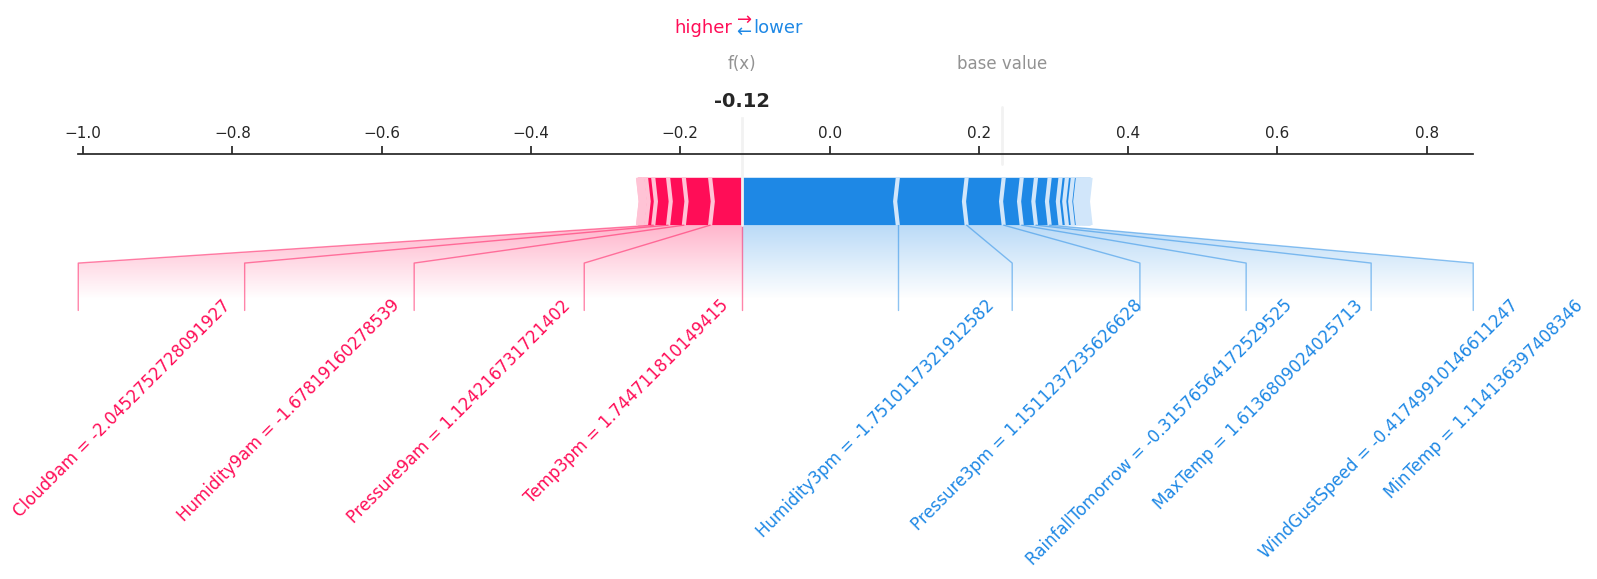

In [ ]:
index=0
shap.force_plot(explainer.expected_value, shap_values[index], test_processed.iloc[index],
                feature_names=feature_names, matplotlib=True, figsize=(18, 4),
                text_rotation=45)

Este gráfico muestra cómo cada característica influye en la predicción de una instancia específica, ademas,este gráfico muestra la distribución de los valores SHAP para cada característica en el conjunto de datos de prueba. Muestra la influencia de cada característica en las predicciones.

Este gráfico muestra la relación entre el valor de una característica y el valor SHAP correspondiente, destacando cómo cambia la predicción con respecto a una característica específica.

**Variables más importantes y menos importantes**

En el gráfico de resumen de SHAP, las características más importantes aparecerán en la parte superior del gráfico, es decir,.
En el gráfico de barras de importancia de características, las características con las barras más largas son las más importantes.

In [ ]:
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=feature_names)


In [ ]:
# Crear una explicación SHAP asegurándose de que las dimensiones coincidan
explanation1 = shap.Explanation(values=shap_values,
                               base_values=explainer.expected_value,
                               data=x_test_scaled,
                               feature_names=feature_names)


In [ ]:
shap.plots.waterfall(explanation1)

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (5642, 30)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

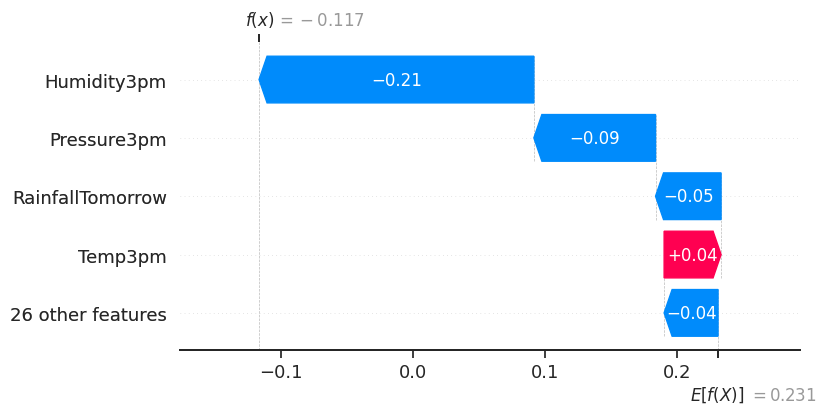

In [ ]:
shap.plots.waterfall(explanation, max_display=5)

#interpretabilidad global

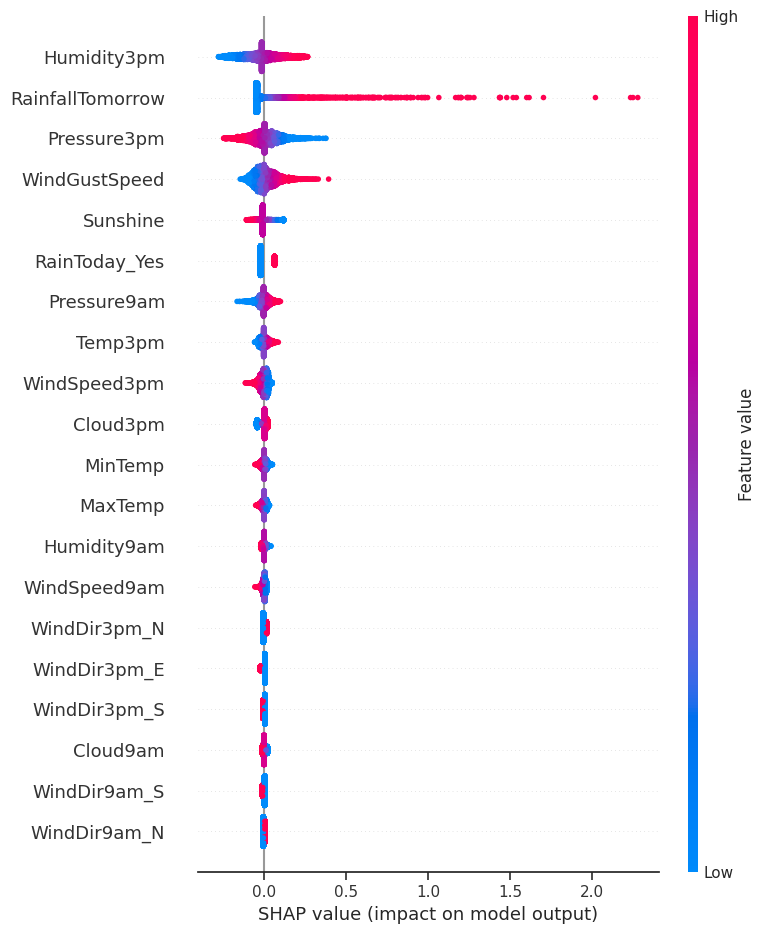

In [ ]:
shap.summary_plot(shap_values, x_test_scaled_shap, feature_names=test_processed.columns)


Este gráfico muestra la distribución de los valores SHAP para cada característica en el conjunto de datos de prueba. Muestra la influencia de cada característica en las predicciones.

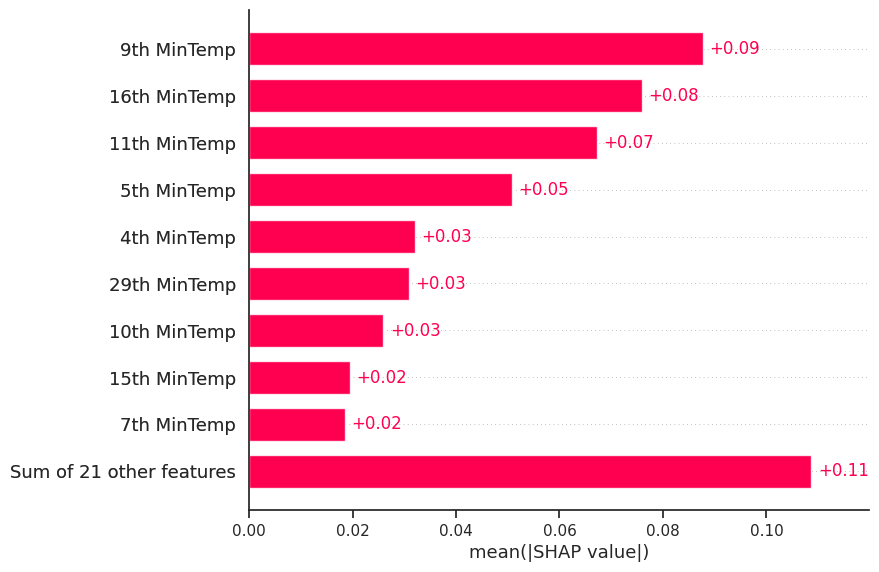

In [ ]:
shap.plots.bar(explanation1)

In [ ]:
shap.summary_plot(shap_values, x_test_scaled_shap, feature_names=test_processed.columns, plot_type='bar')


Este gráfico muestra la importancia promedio absoluta de los valores SHAP para cada característica, destacando las características más influyentes.